In [3]:
# import sys 

In [4]:
# !{sys.executable} -m pip install --user cleverminer==0.0.82

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cleverminer
from cleverminer.cleverminer import cleverminer

***********************************************************************************************************************************************************************
Cleverminer version  0.0.82
IMPORTANT NOTE: this is preliminary development version of CleverMiner procedure. This procedure is under intensive development and early released for educational use,
    so there is ABSOLUTELY no guarantee of results, possible gaps in functionality and no guarantee of keeping syntax and parameters as in current version.
    (That means we need to tidy up and make proper design, input validation, documentation and instrumentation before launch)
This version is for personal and educational use only.
***********************************************************************************************************************************************************************


In [6]:
df = pd.read_csv(('germany_housing_data_14.07.2020.csv'), index_col=0)

In [7]:
# first 5 rows
df.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


In [8]:
# types of columns
df.dtypes

Price                      float64
Type                        object
Living_space               float64
Lot                        float64
Usable_area                float64
Free_of_Relation            object
Rooms                      float64
Bedrooms                   float64
Bathrooms                  float64
Floors                     float64
Year_built                 float64
Furnishing_quality          object
Year_renovated             float64
Condition                   object
Heating                     object
Energy_source               object
Energy_certificate          object
Energy_certificate_type     object
Energy_consumption         float64
Energy_efficiency_class     object
State                       object
City                        object
Place                       object
Garages                    float64
Garagetype                  object
dtype: object

In [9]:
# rows & columns
df.shape

(10552, 25)

In [10]:
# missing values
df.isna().sum()

Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                4984
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64

## Atributes

### Type

In [11]:
colorblind_palette = sns.color_palette("colorblind")

<AxesSubplot:title={'center':'Type'}, xlabel='Type', ylabel='count'>

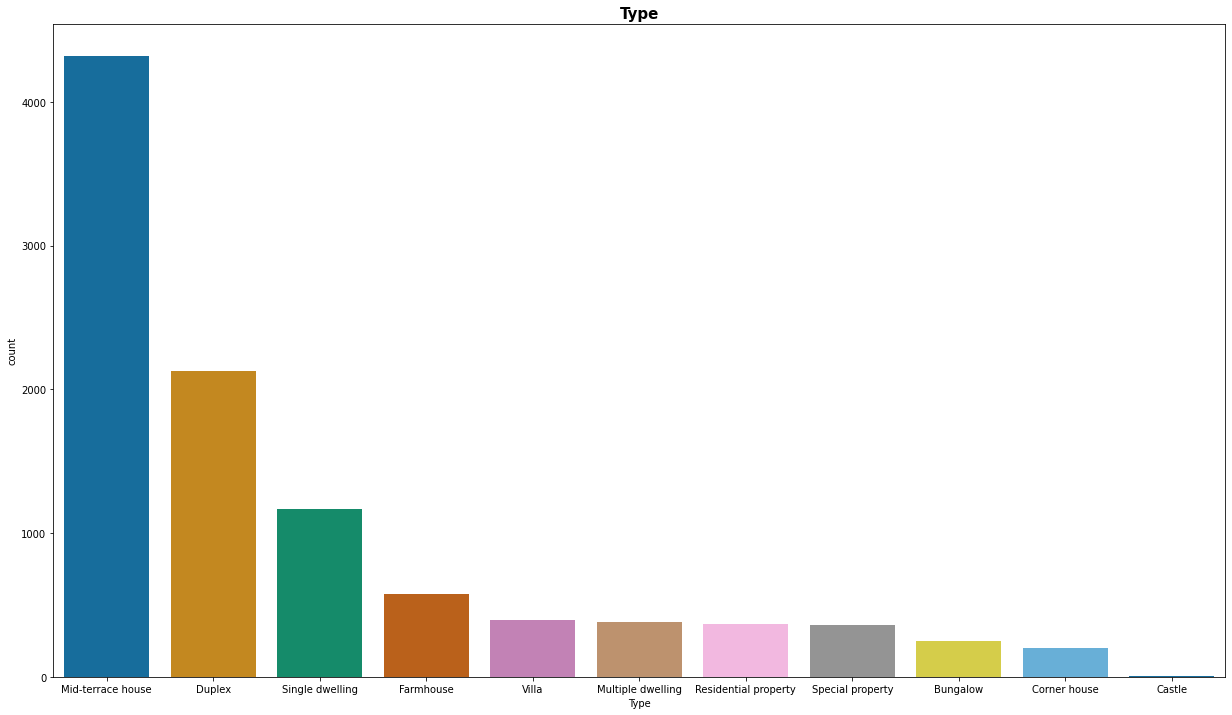

In [12]:
# the most used types
plt.figure(figsize=(21,12)) 
plt.title('Type', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Type'], data=df, palette=colorblind_palette, order=df['Type'].value_counts().iloc[-20:].index)

### Price

<AxesSubplot:title={'center':'Price'}, xlabel='Price'>

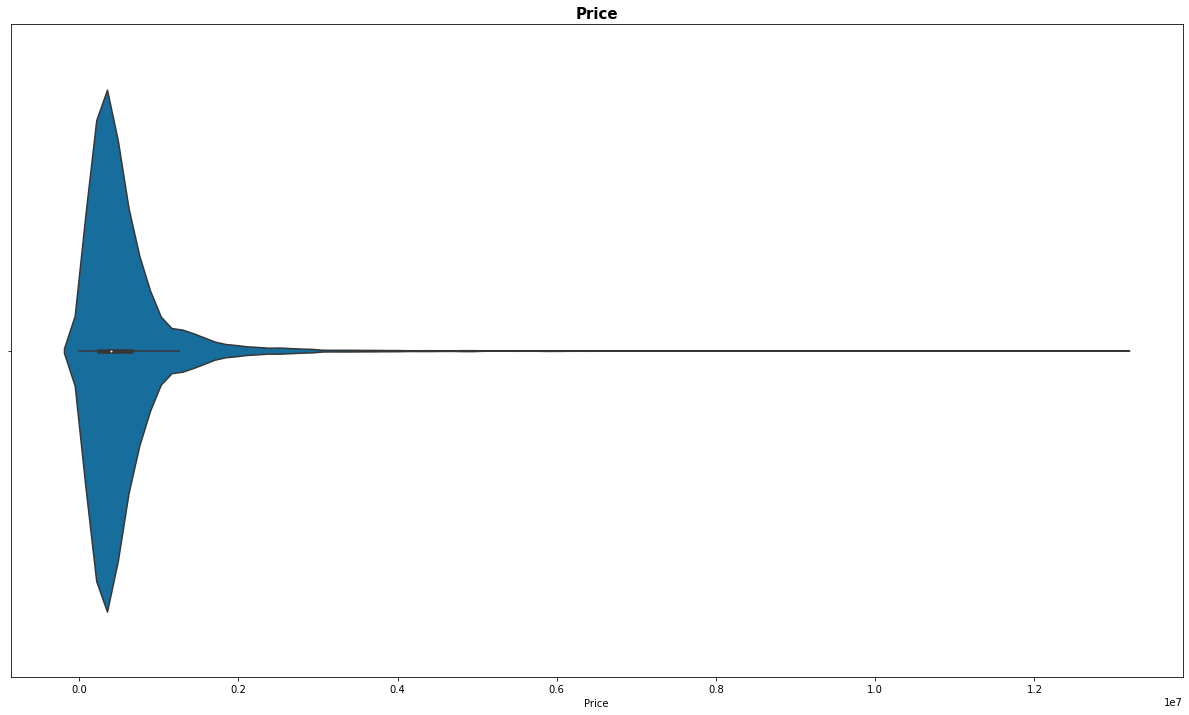

In [13]:
# plot price
plt.figure(figsize=(21,12)) 
plt.title('Price', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Price'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Price - first 20 records'}, xlabel='Price', ylabel='count'>

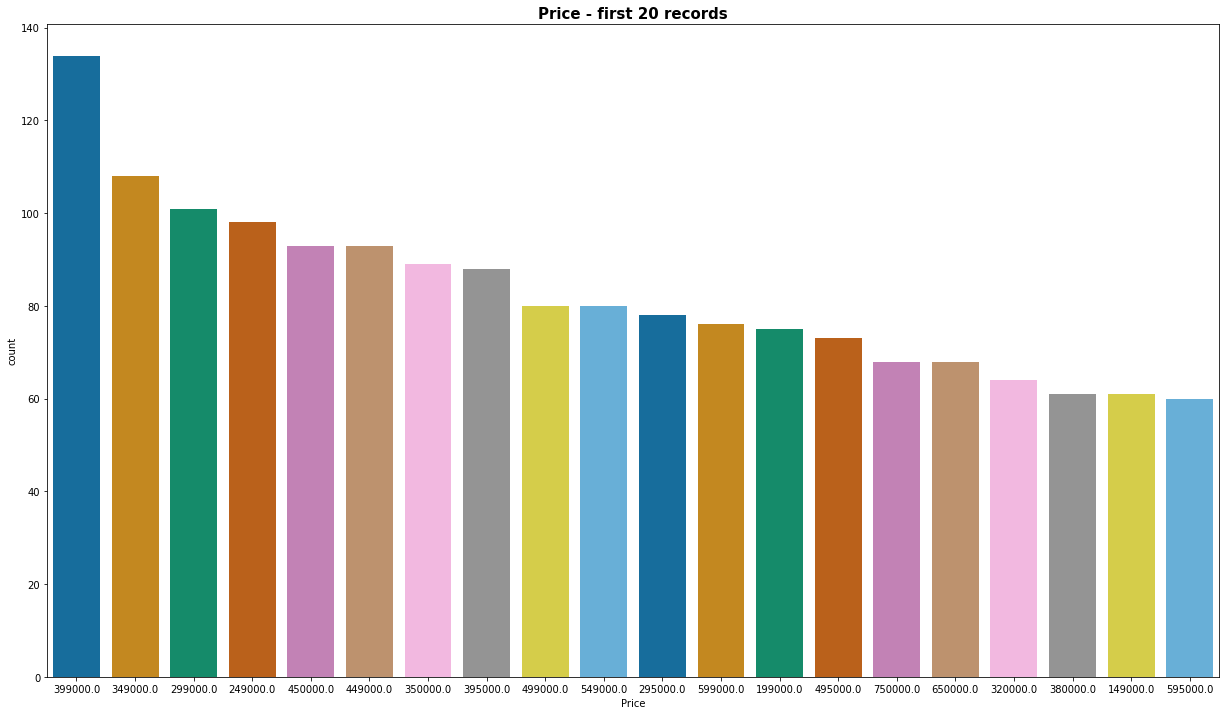

In [14]:
# plot price - first 20
plt.figure(figsize=(21,12)) 
plt.title('Price - first 20 records', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Price'], palette=colorblind_palette, order=df['Price'].value_counts().iloc[:20].index)

<AxesSubplot:title={'center':'Price - last 20 records'}, xlabel='Price', ylabel='count'>

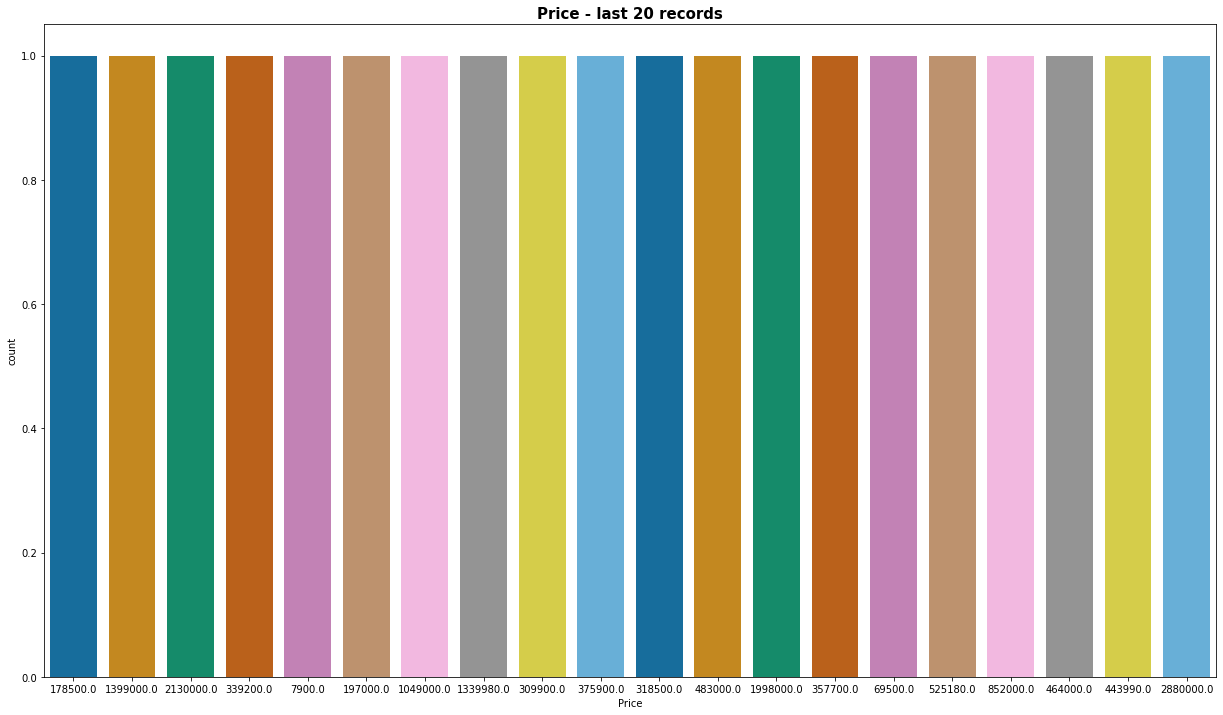

In [15]:
# plot price - last 20
plt.figure(figsize=(21,12)) 
plt.title('Price - last 20 records', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Price'], palette=colorblind_palette, order=df['Price'].value_counts().iloc[-20:].index)

In [16]:
# make 5 equidistant & equifrequent categories
price_ed = pd.cut(df['Price'], 5, precision=0)
price_ef = pd.qcut(df['Price'], 5, precision=0)

<AxesSubplot:title={'center':'Price Equidistant Categories'}, xlabel='Price', ylabel='count'>

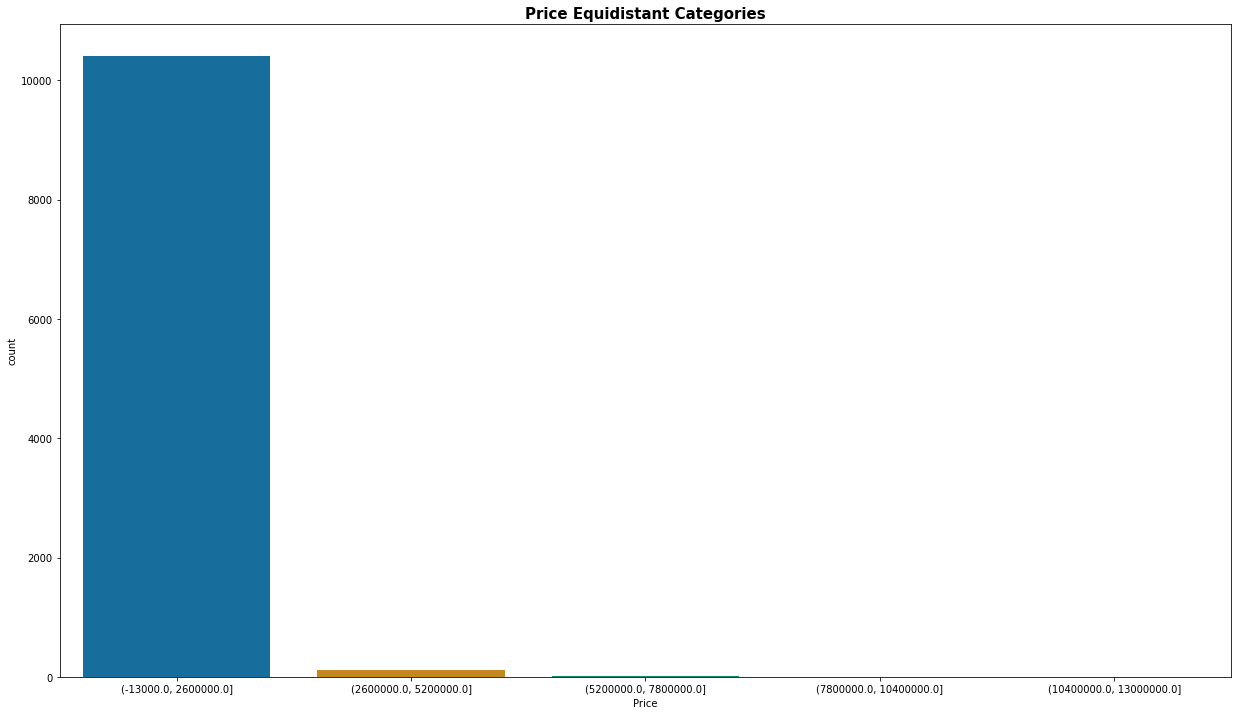

In [17]:
# plot equidistant categories
plt.figure(figsize=(21,12)) 
plt.title('Price Equidistant Categories', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=price_ed, data=df, palette=colorblind_palette)

<AxesSubplot:title={'center':'Price Equifrequent categories'}, xlabel='Price', ylabel='count'>

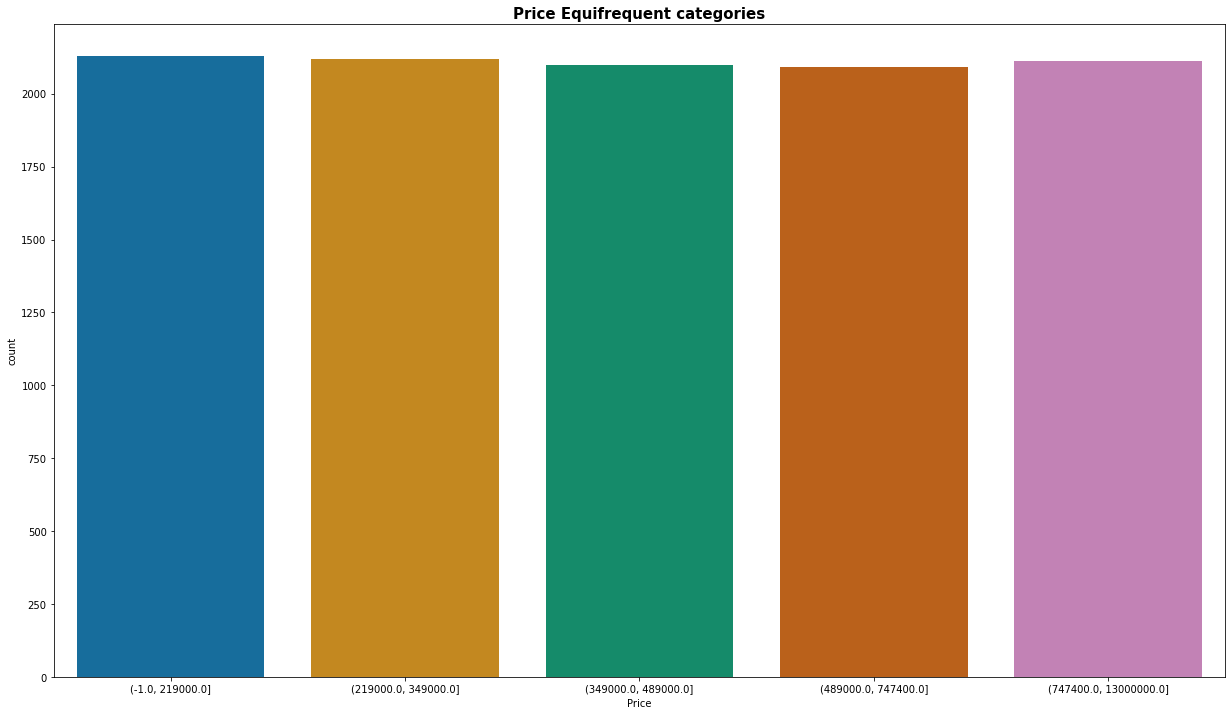

In [18]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Price Equifrequent categories', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=price_ef, data=df, palette=colorblind_palette)

### Living Space

<AxesSubplot:title={'center':'Living Space'}, xlabel='Living_space'>

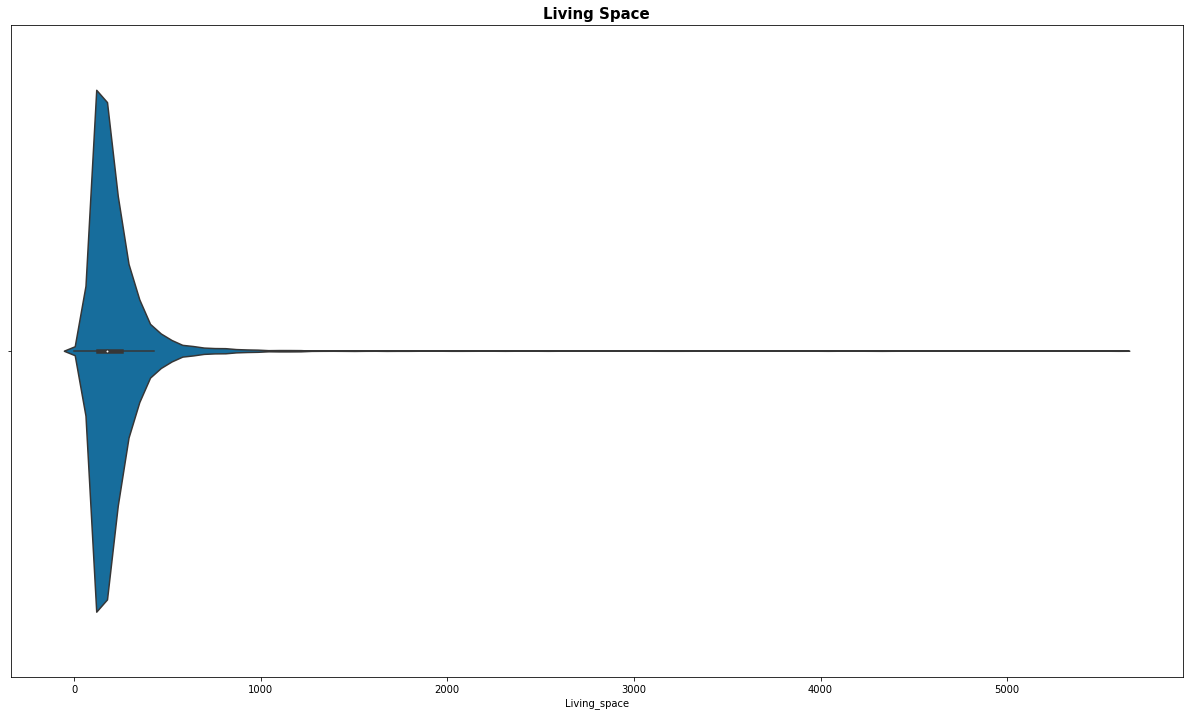

In [19]:
# plot living space 
plt.figure(figsize=(21,12)) 
plt.title('Living Space', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Living_space'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Living Space'}, xlabel='Living_space', ylabel='count'>

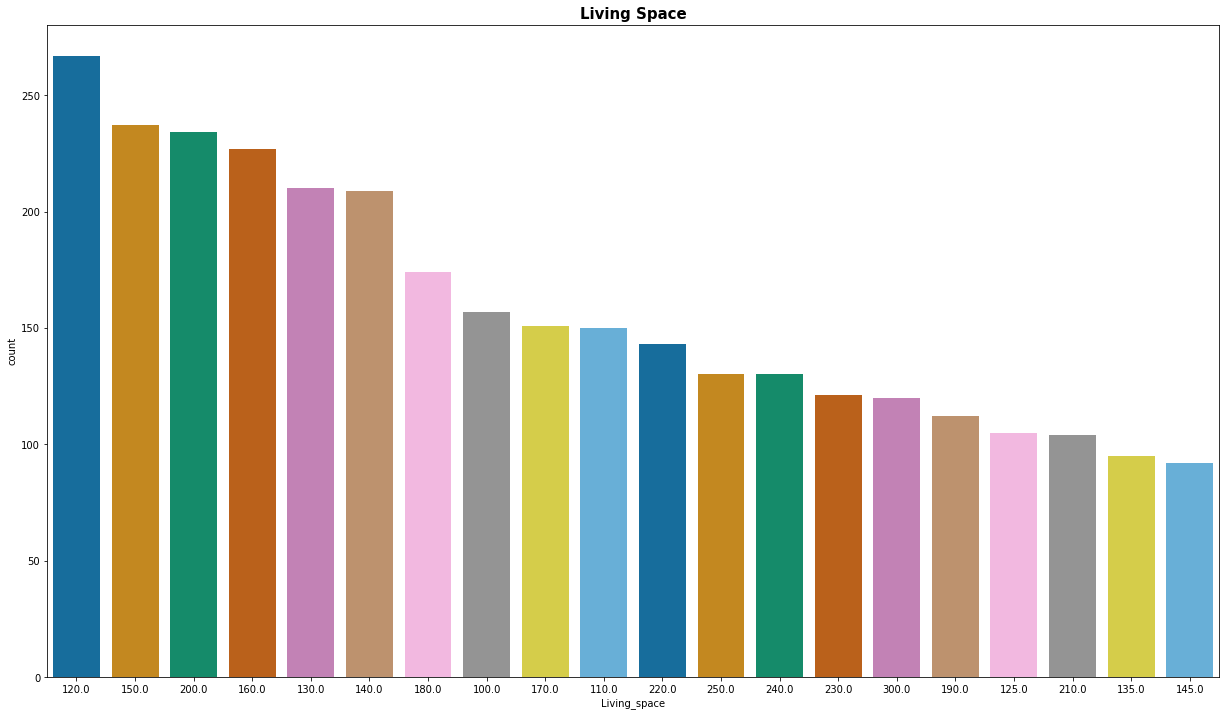

In [20]:
# plot living space - first 20 
plt.figure(figsize=(21,12)) 
plt.title('Living Space', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Living_space'], palette=colorblind_palette, order=df['Living_space'].value_counts().iloc[:20].index)

In [21]:
# make equidistant & equifrequent categories
living_space_ed = pd.cut(df['Living_space'], 5, precision=0)
living_space_ef = pd.qcut(df['Living_space'], 5, precision=0)

<AxesSubplot:title={'center':'Living Space Equidistant'}, xlabel='Living_space', ylabel='count'>

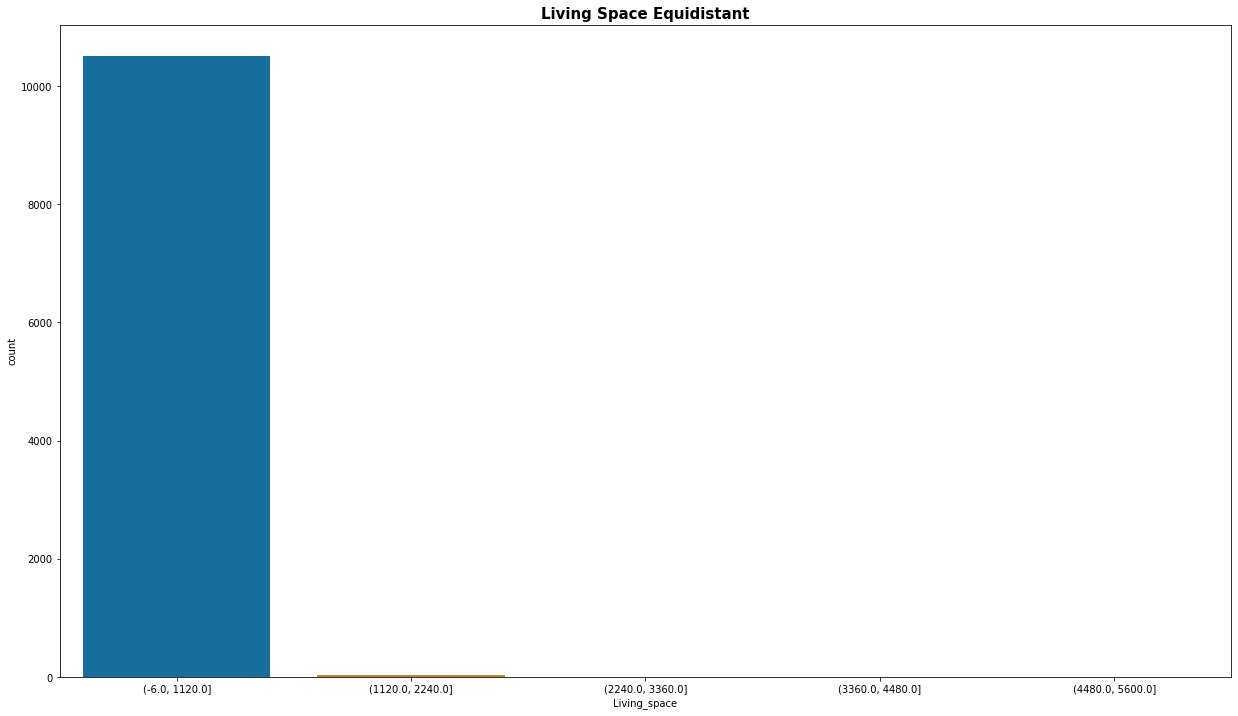

In [22]:
# plot equidistant categories
plt.figure(figsize=(21,12)) 
plt.title('Living Space Equidistant', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=living_space_ed, data=df, palette=colorblind_palette)

<AxesSubplot:title={'center':'Living Space Equifrequent'}, xlabel='Living_space', ylabel='count'>

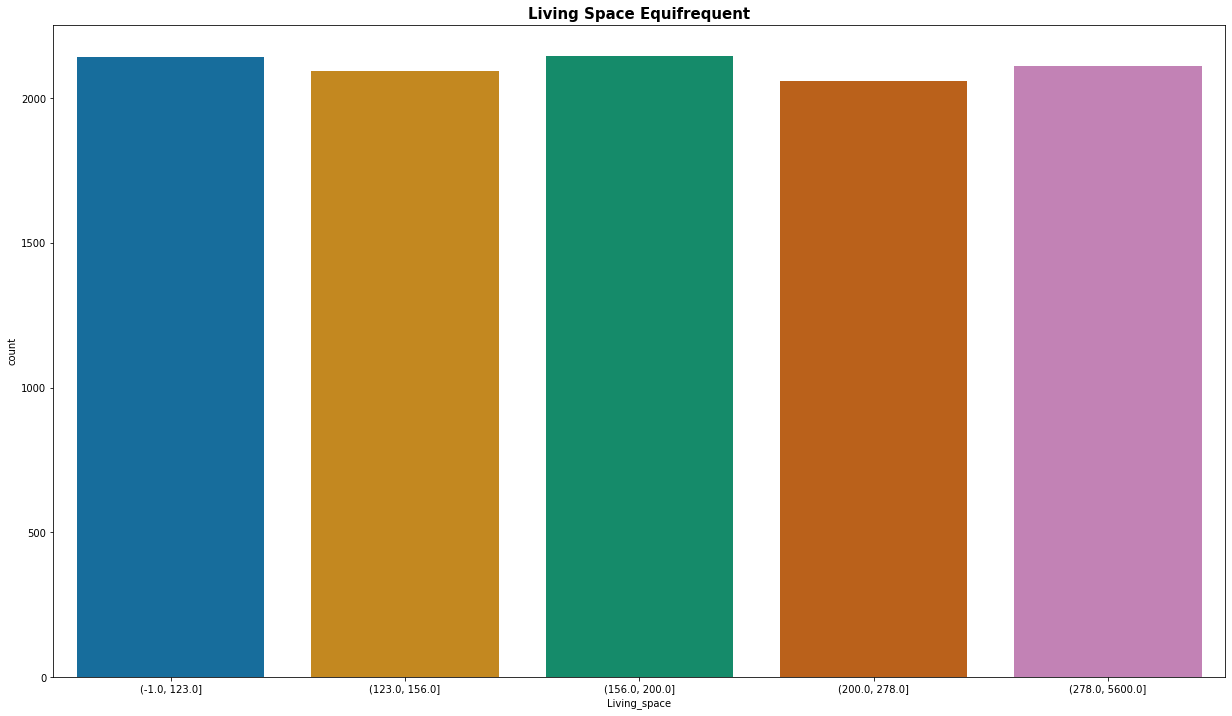

In [23]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Living Space Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=living_space_ef, data=df, palette=colorblind_palette)

### Lot

<AxesSubplot:title={'center':'Lot'}, xlabel='Lot'>

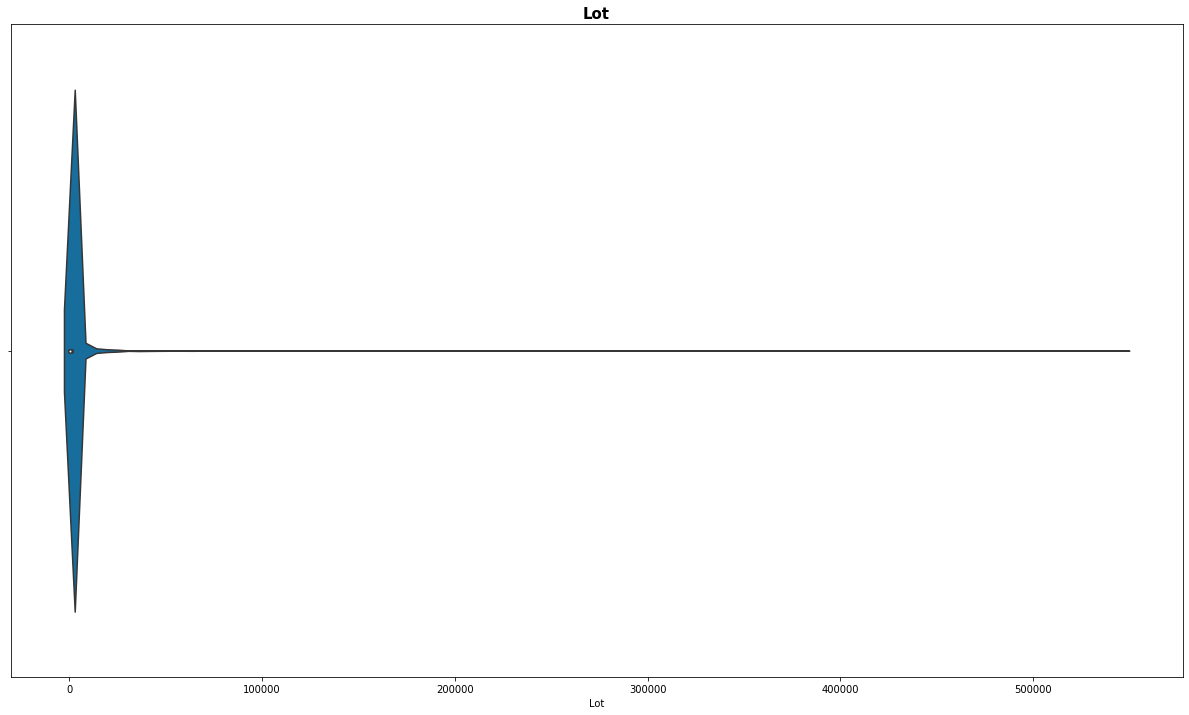

In [24]:
# plot lot area
plt.figure(figsize=(21,12)) 
plt.title('Lot', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Lot'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Lot - first 20 reocrds'}, xlabel='Lot', ylabel='count'>

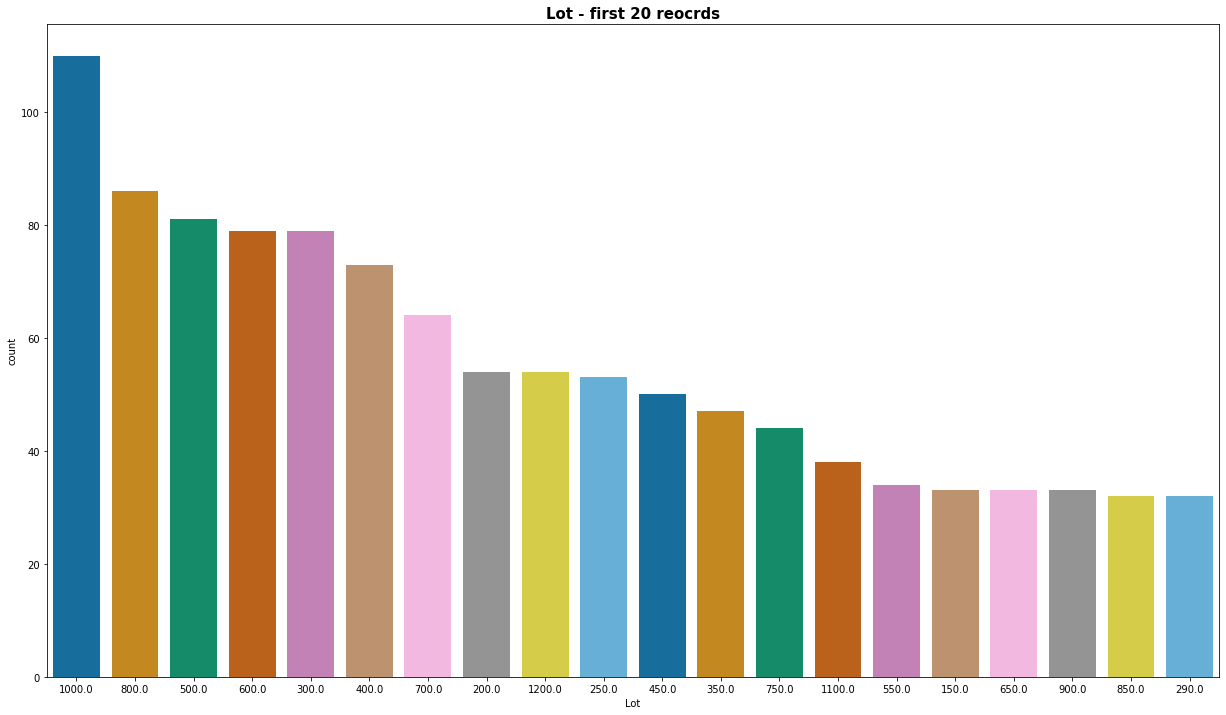

In [25]:
# plot lot area - first 20
plt.figure(figsize=(21,12)) 
plt.title('Lot - first 20 reocrds', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Lot'], data=df, palette=colorblind_palette, order=df['Lot'].value_counts().iloc[:20].index)

In [26]:
# make equidistant & equifrequent categories
lot_ed = pd.cut(df['Lot'], 5, precision=0)
lot_ef = pd.qcut(df['Lot'], 5, precision=0)

<AxesSubplot:title={'center':'Lot Equidistant'}, xlabel='Lot', ylabel='count'>

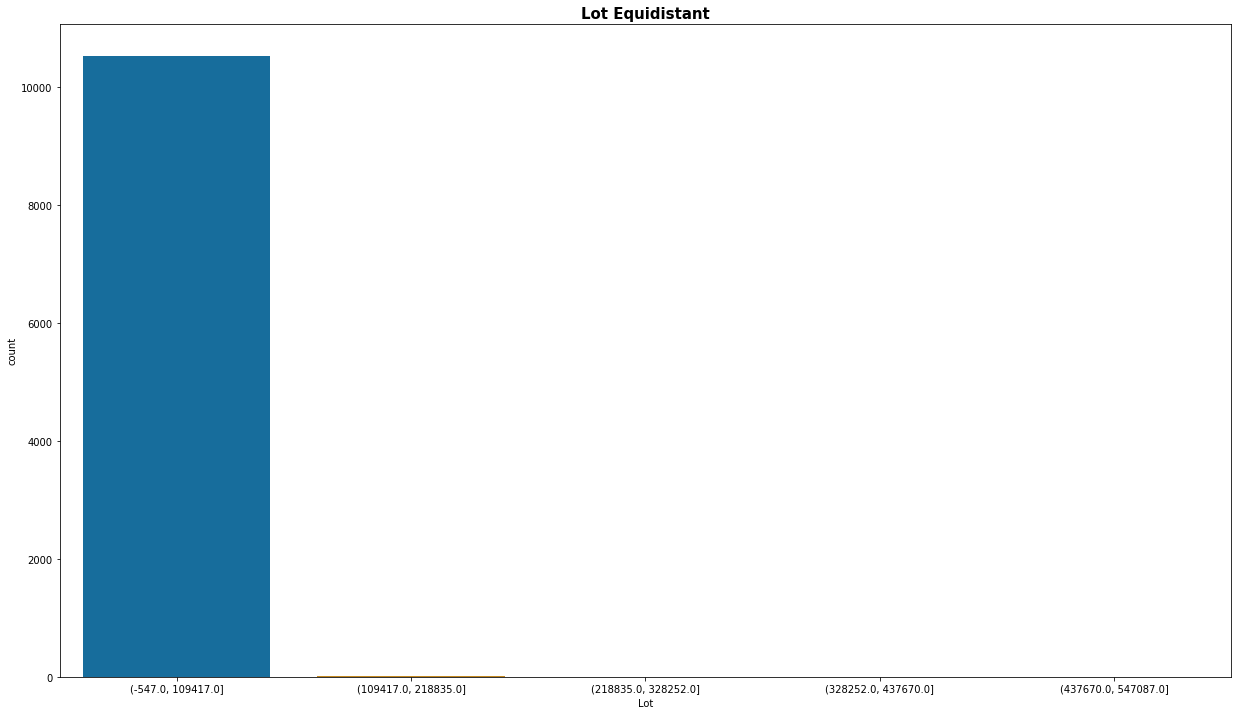

In [27]:
# plot equidistant categories
plt.figure(figsize=(21,12)) 
plt.title('Lot Equidistant', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=lot_ed, data=df, palette=colorblind_palette)

<AxesSubplot:title={'center':'Lot Equifrequent'}, xlabel='Lot', ylabel='count'>

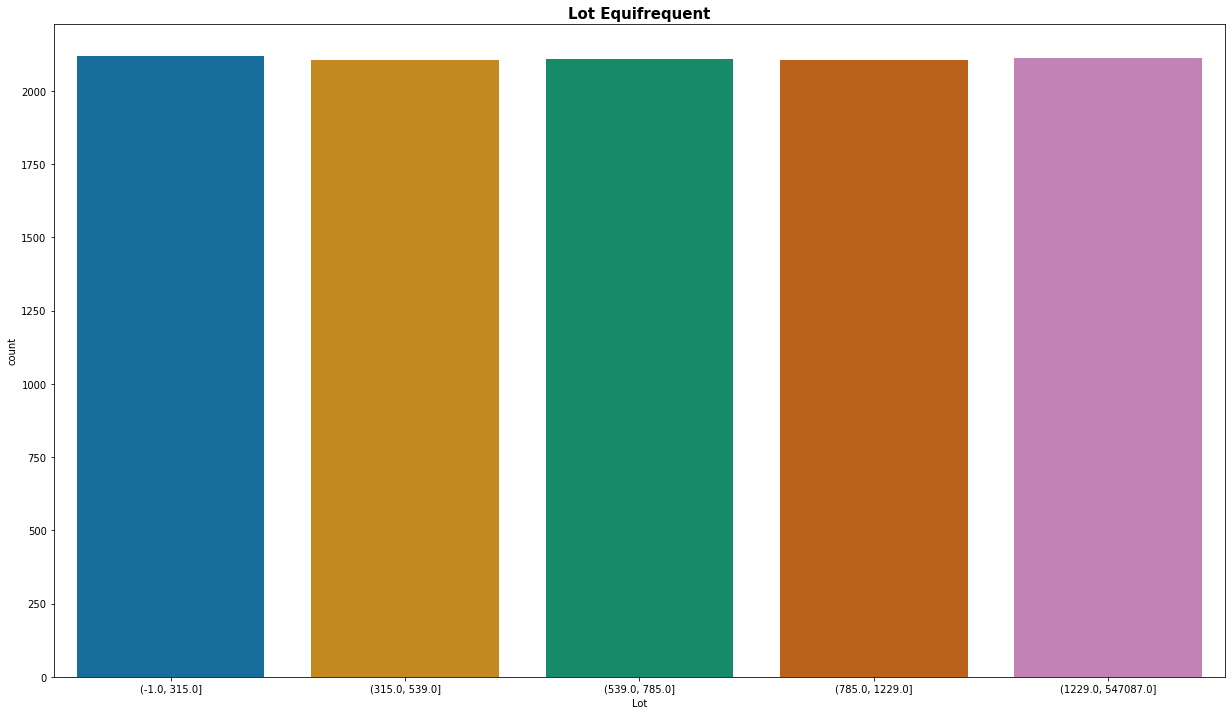

In [28]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Lot Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=lot_ef, data=df, palette=colorblind_palette)

### Usable area 

<AxesSubplot:title={'center':'Usable area'}, xlabel='Usable_area'>

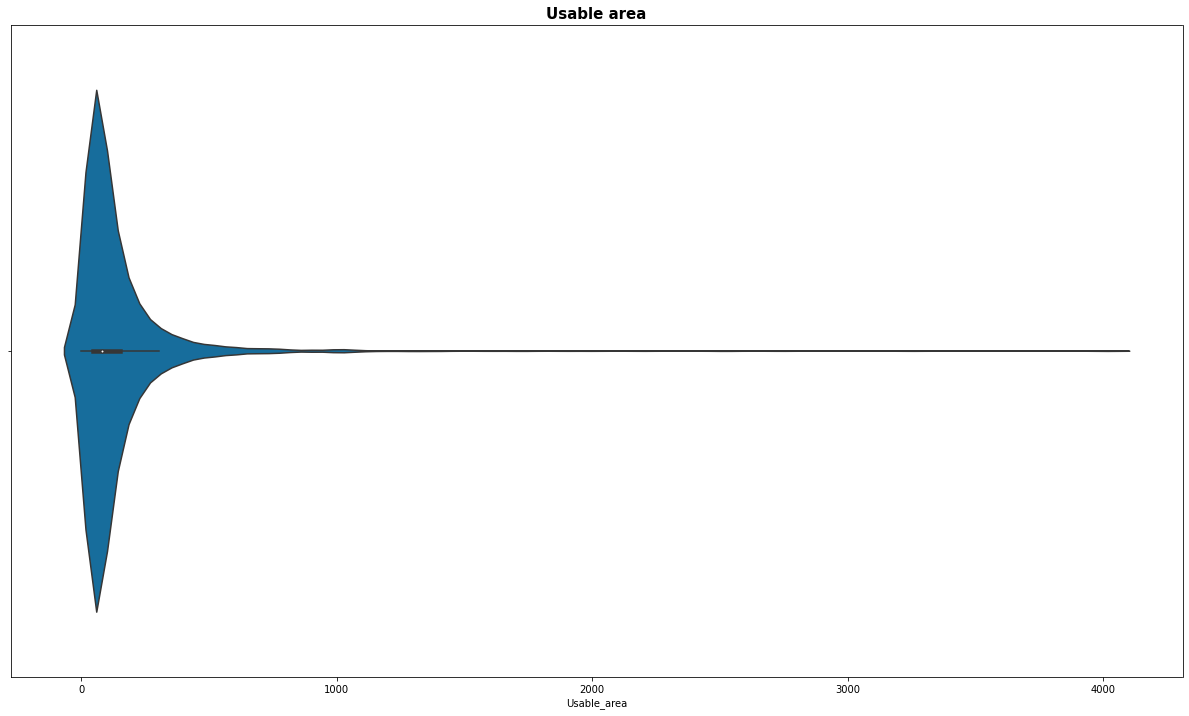

In [29]:
# plot usable area
plt.figure(figsize=(21,12)) 
plt.title('Usable area', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Usable_area'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Usable area - first 30 records'}, xlabel='Usable_area', ylabel='count'>

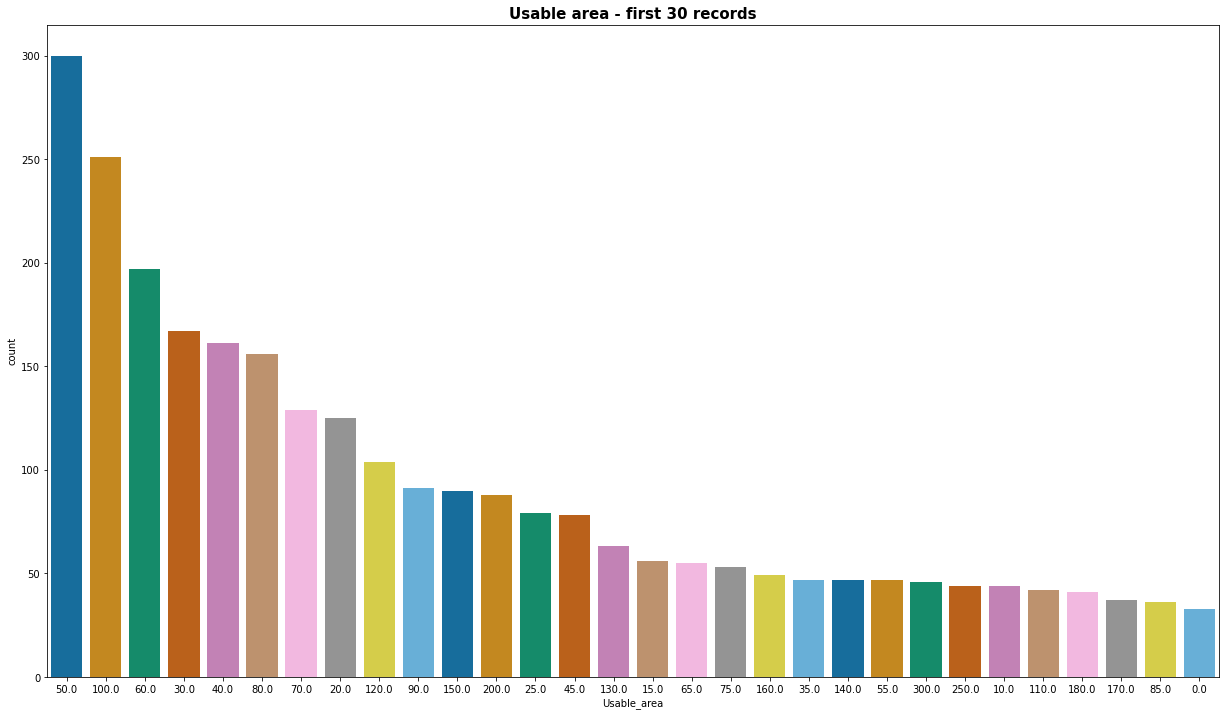

In [30]:
# plot usable area - the most common 30 records
plt.figure(figsize=(21,12)) 
plt.title('Usable area - first 30 records', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Usable_area'], palette=colorblind_palette, order=df['Usable_area'].value_counts().iloc[:30].index)

In [31]:
# make equidistant & equifrequent categories
usable_area_ed = pd.cut(df['Usable_area'], 5, precision=0)
usable_area_ef = pd.qcut(df['Usable_area'], 5, precision=0)

<AxesSubplot:title={'center':'Usable area Equidistant'}, xlabel='Usable_area', ylabel='count'>

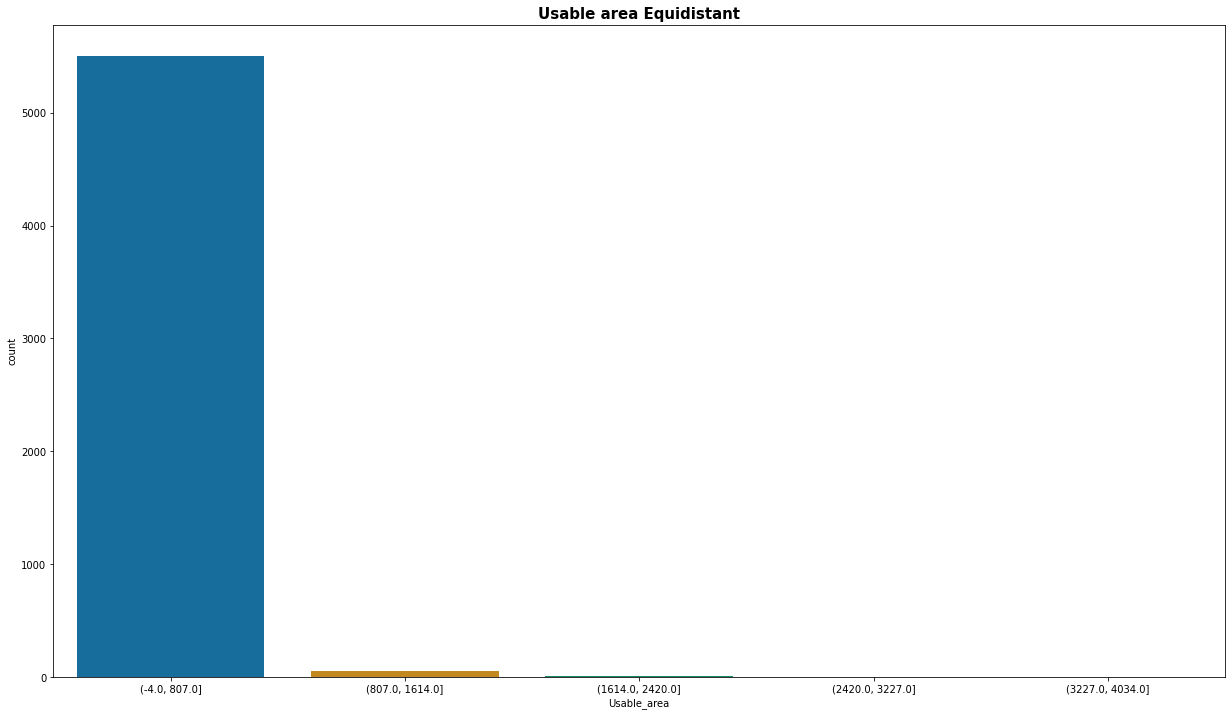

In [32]:
# plot equidistant categories
plt.figure(figsize=(21,12)) 
plt.title('Usable area Equidistant', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=usable_area_ed, data=df, palette=colorblind_palette)

<AxesSubplot:title={'center':'Usable area Equifrequent'}, xlabel='Usable_area', ylabel='count'>

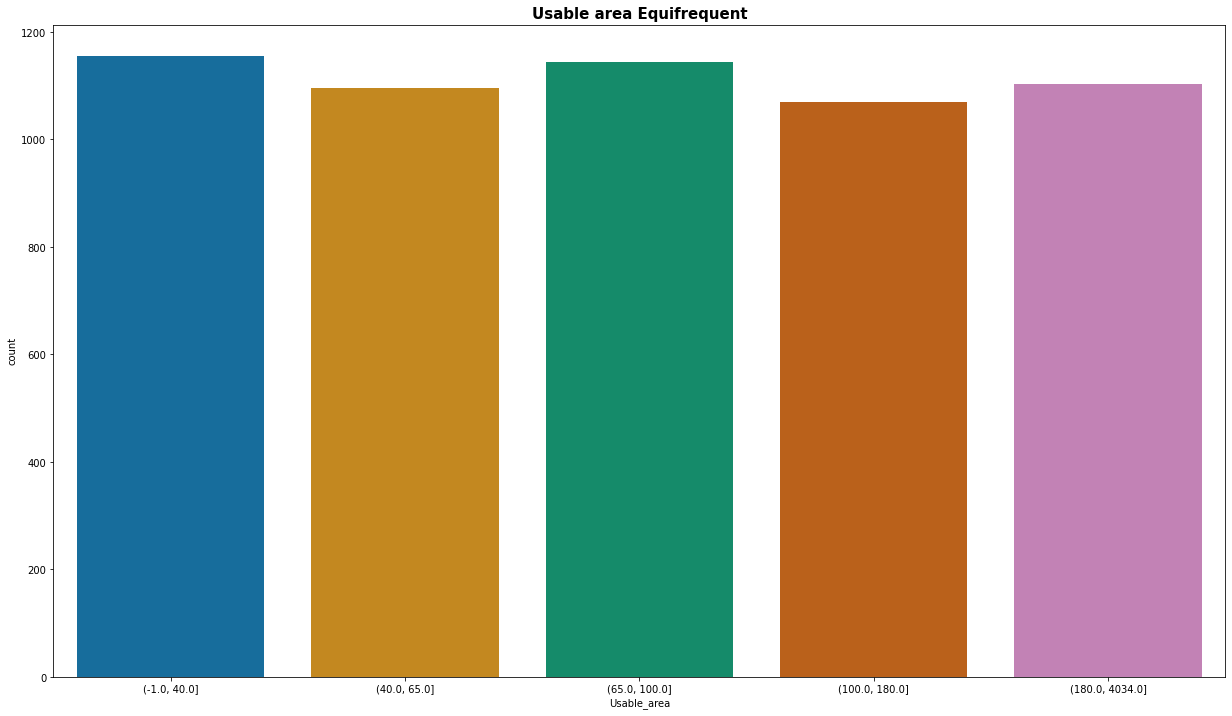

In [33]:
# plot equifrequent categories
plt.figure(figsize=(21,12)) 
plt.title('Usable area Equifrequent', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=usable_area_ef, data=df, palette=colorblind_palette)

### Free_of_Relation

<AxesSubplot:title={'center':'Free Of Relation'}, xlabel='Free_of_Relation', ylabel='count'>

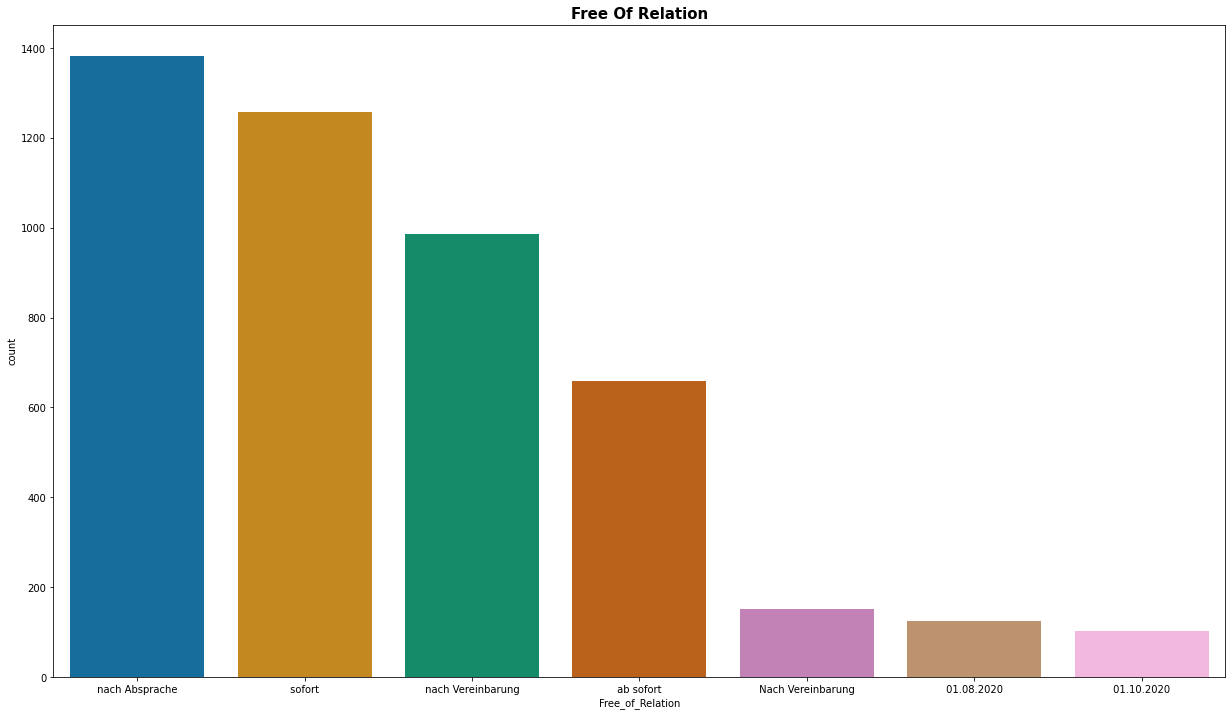

In [34]:
# availability - the first 7 commonly used dates from which flat is available
plt.figure(figsize=(21,12)) 
plt.title('Free Of Relation', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Free_of_Relation'], data=df, palette=colorblind_palette, order=df['Free_of_Relation'].value_counts().iloc[:7].index)

### Rooms

<AxesSubplot:title={'center':'Rooms'}, xlabel='Rooms'>

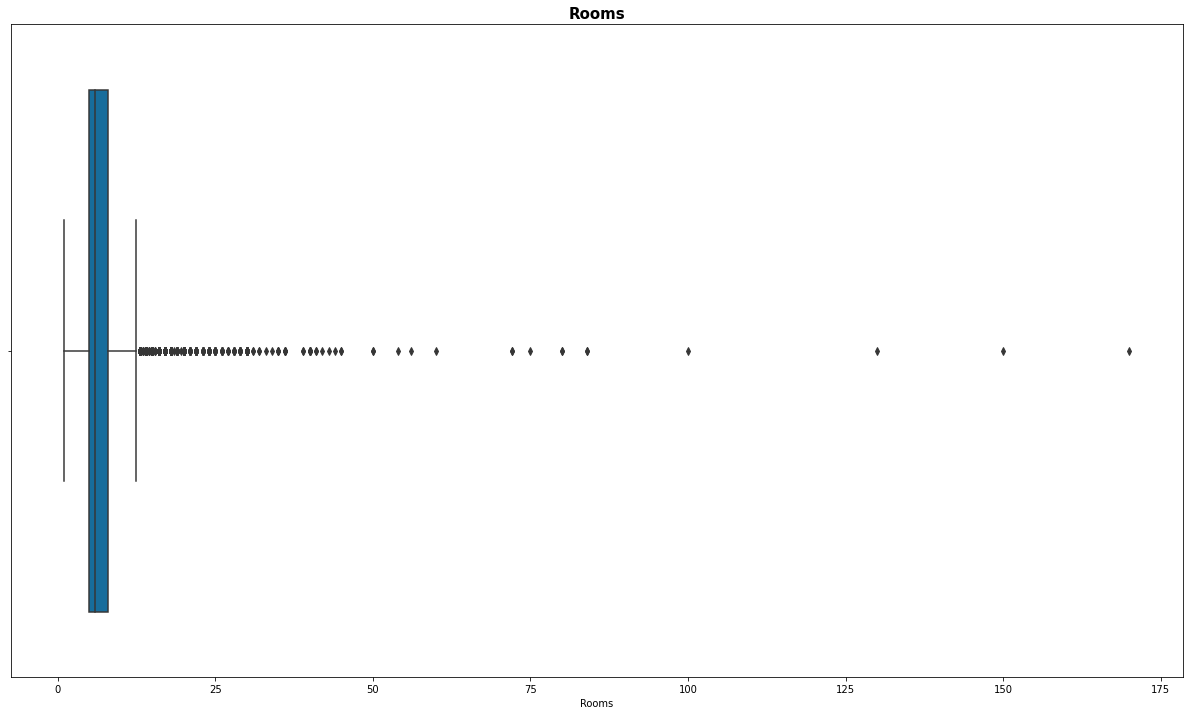

In [35]:
# the most common amount of rooms
plt.figure(figsize=(21,12)) 
plt.title('Rooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Rooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Rooms'}, xlabel='Rooms', ylabel='count'>

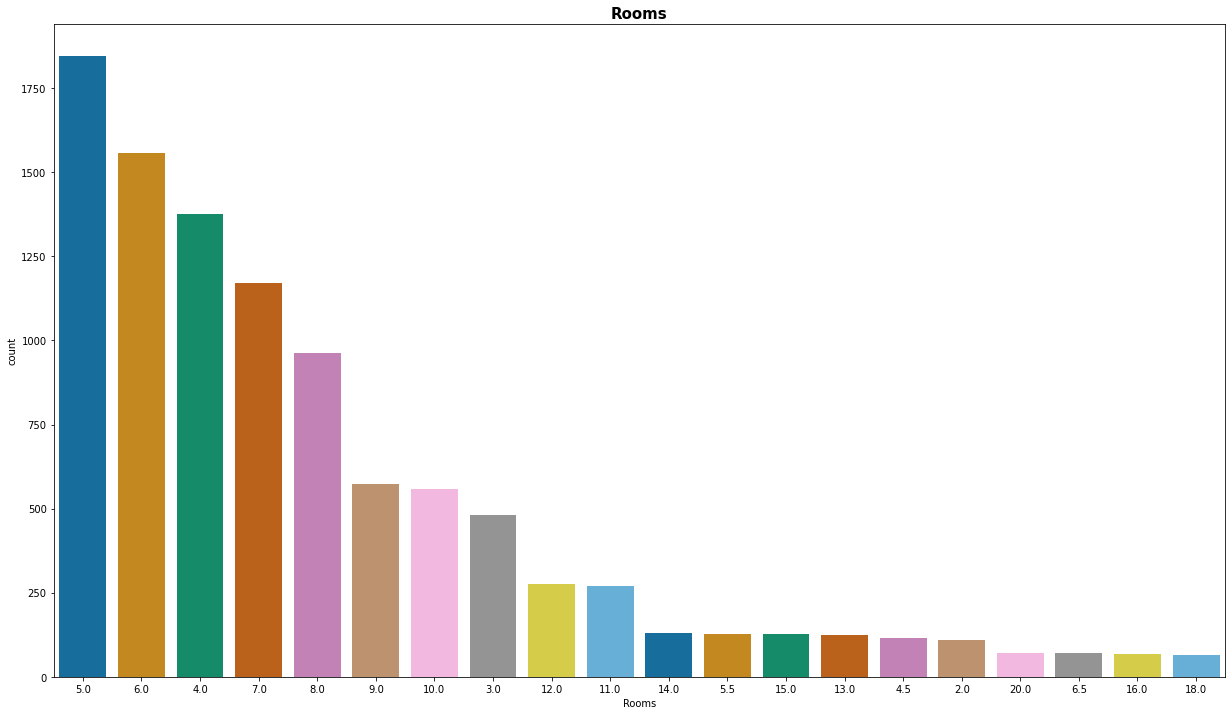

In [36]:
# the most common amount of rooms - first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Rooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Rooms'], palette=colorblind_palette, order=df['Rooms'].value_counts().iloc[:20].index)

### Bedrooms

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms'>

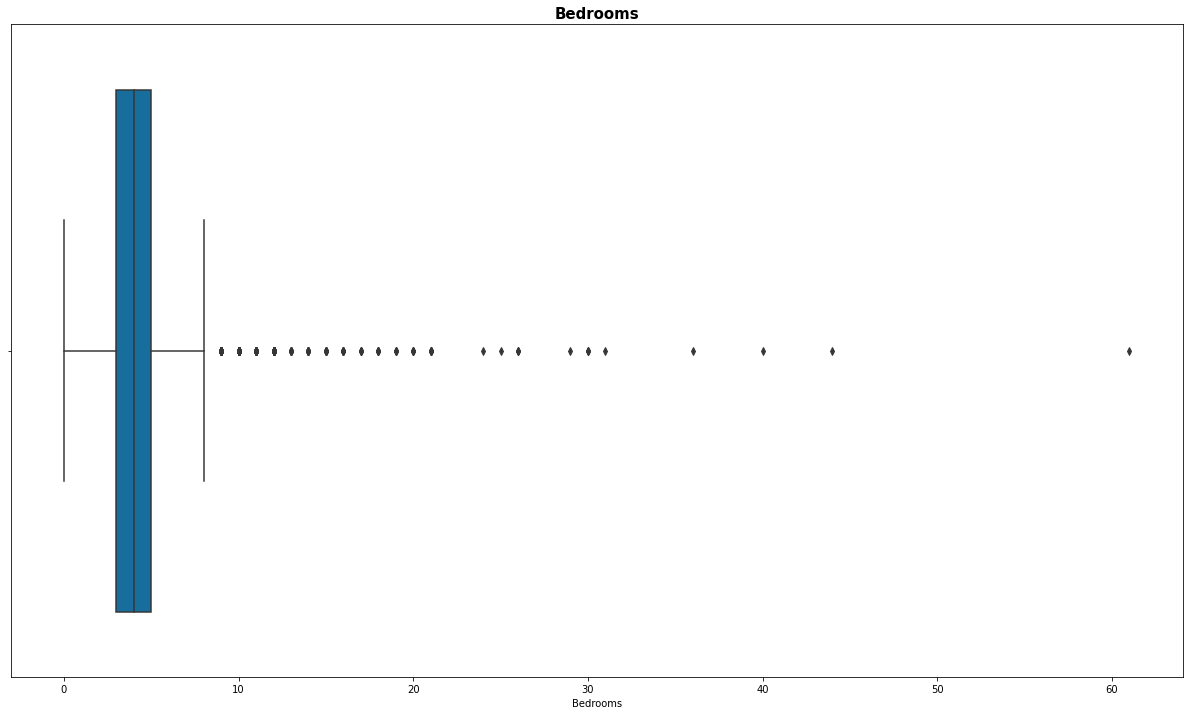

In [37]:
# the most common amount of bedrooms
plt.figure(figsize=(21,12)) 
plt.title('Bedrooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Bedrooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Bedrooms'}, xlabel='Bedrooms', ylabel='count'>

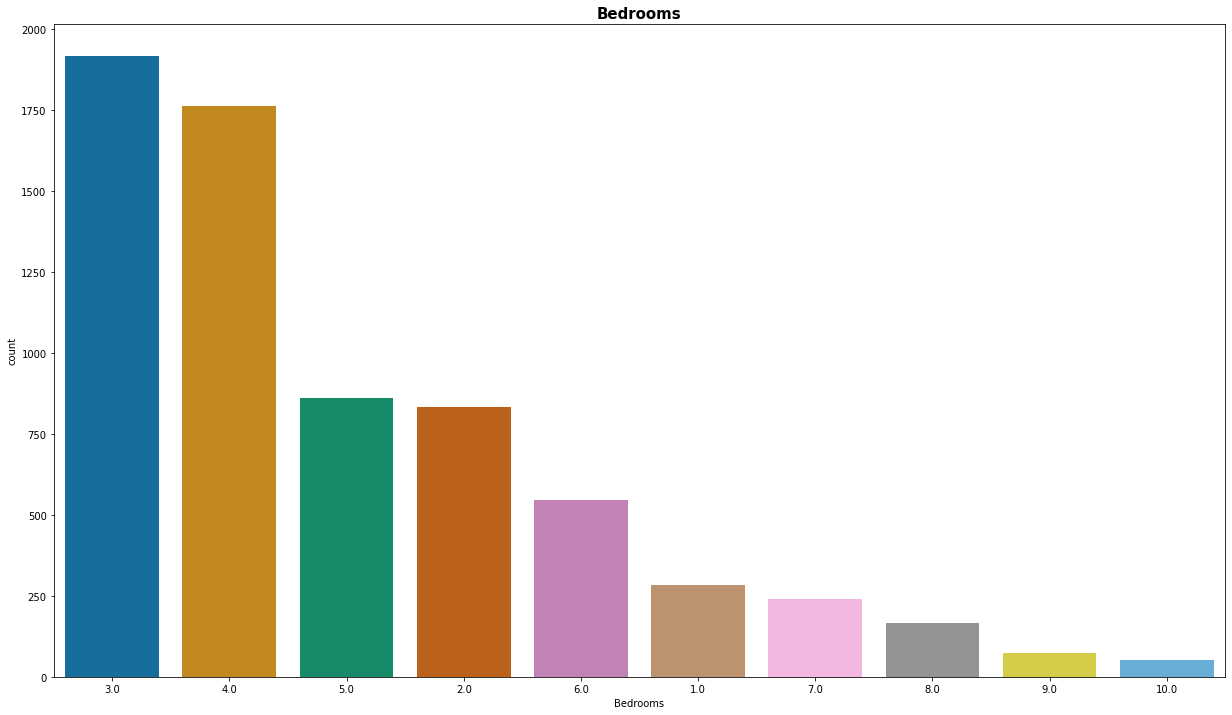

In [38]:
# the most common amount of bedrooms - first 10 records
plt.figure(figsize=(21,12)) 
plt.title('Bedrooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Bedrooms'], palette=colorblind_palette, order=df['Bedrooms'].value_counts().iloc[:10].index)

### Bathrooms

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms'>

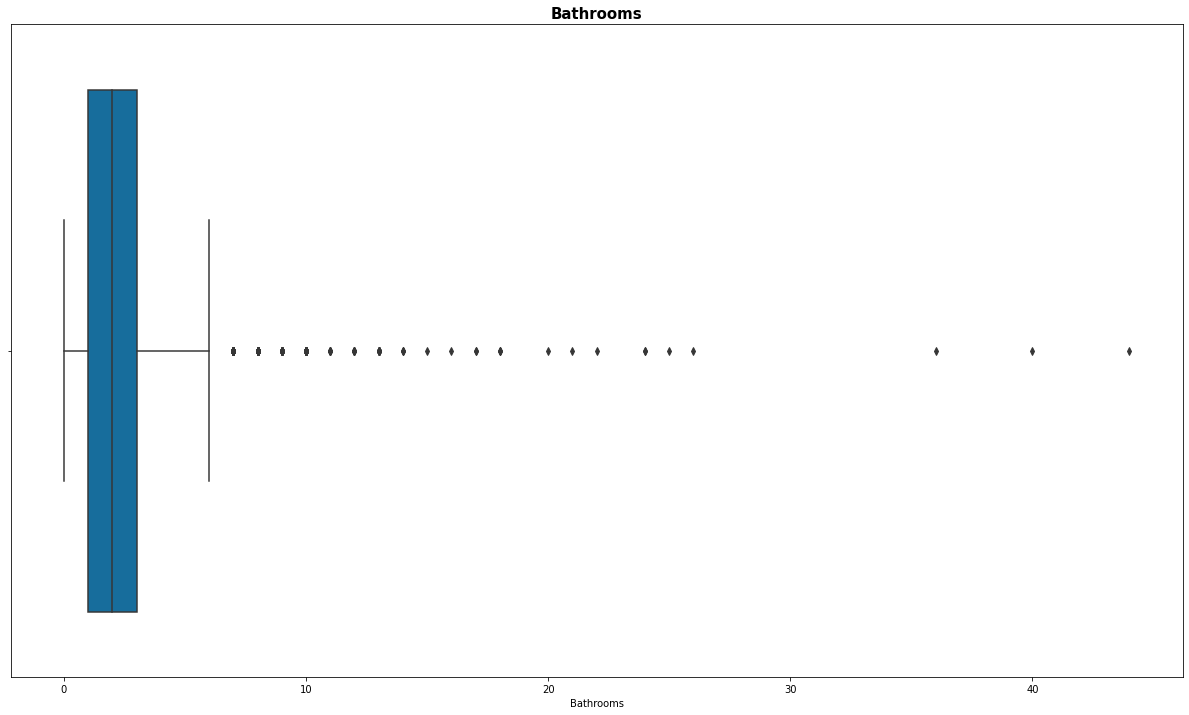

In [39]:
# the most common amount of bathrooms
plt.figure(figsize=(21,12)) 
plt.title('Bathrooms', fontsize=15, fontweight='bold', ha='center')
sns.boxplot(x=df['Bathrooms'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Bathrooms'}, xlabel='Bathrooms', ylabel='count'>

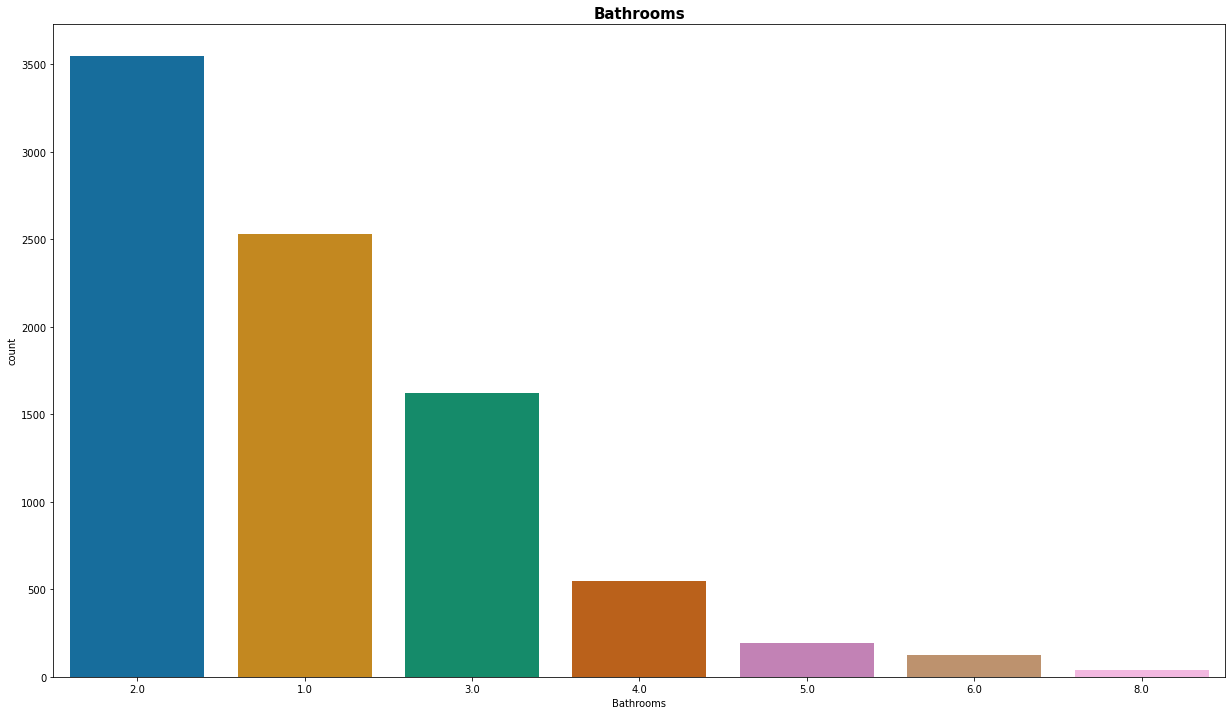

In [40]:
# the most common amount of bathrooms - first 7 records
plt.figure(figsize=(21,12)) 
plt.title('Bathrooms', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Bathrooms'], palette=colorblind_palette, order=df['Bathrooms'].value_counts().iloc[:7].index)

### Floors

<AxesSubplot:title={'center':'Floors'}, xlabel='Floors', ylabel='count'>

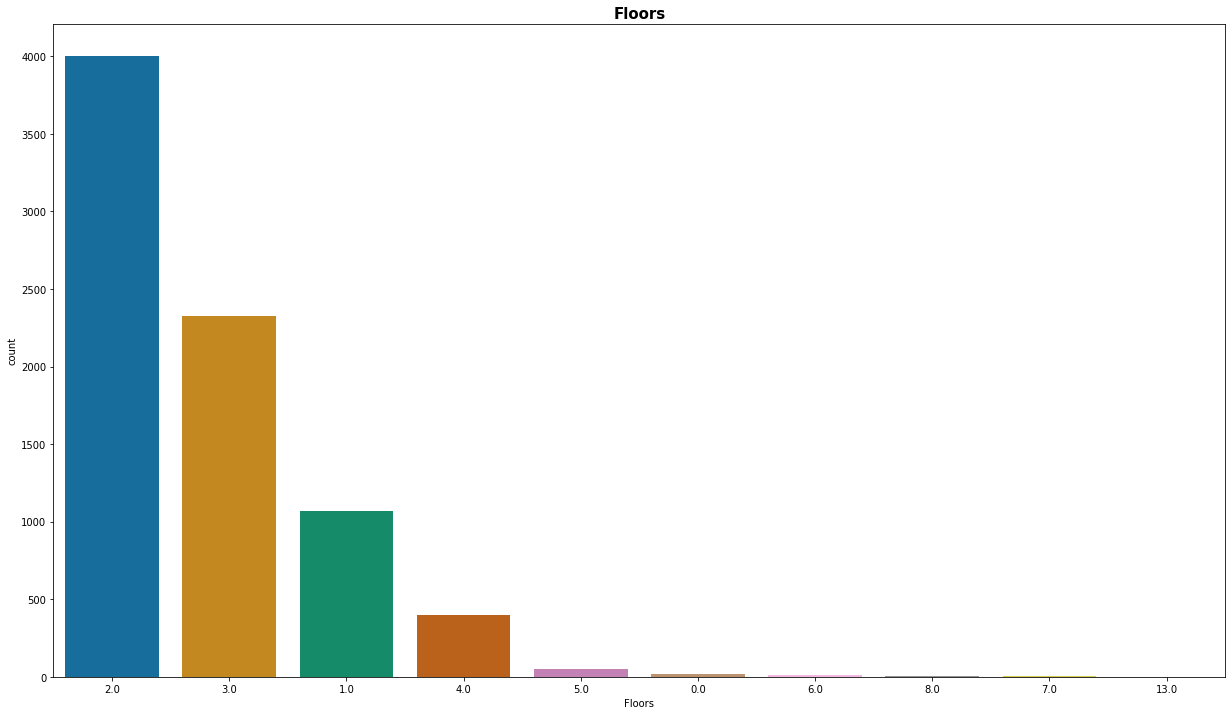

In [41]:
# all floors
plt.figure(figsize=(21,12)) 
plt.title('Floors', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Floors'], data=df, palette=colorblind_palette, order=df['Floors'].value_counts().iloc[:].index)

### Year built

<AxesSubplot:title={'center':'Year Built'}, xlabel='Year_built'>

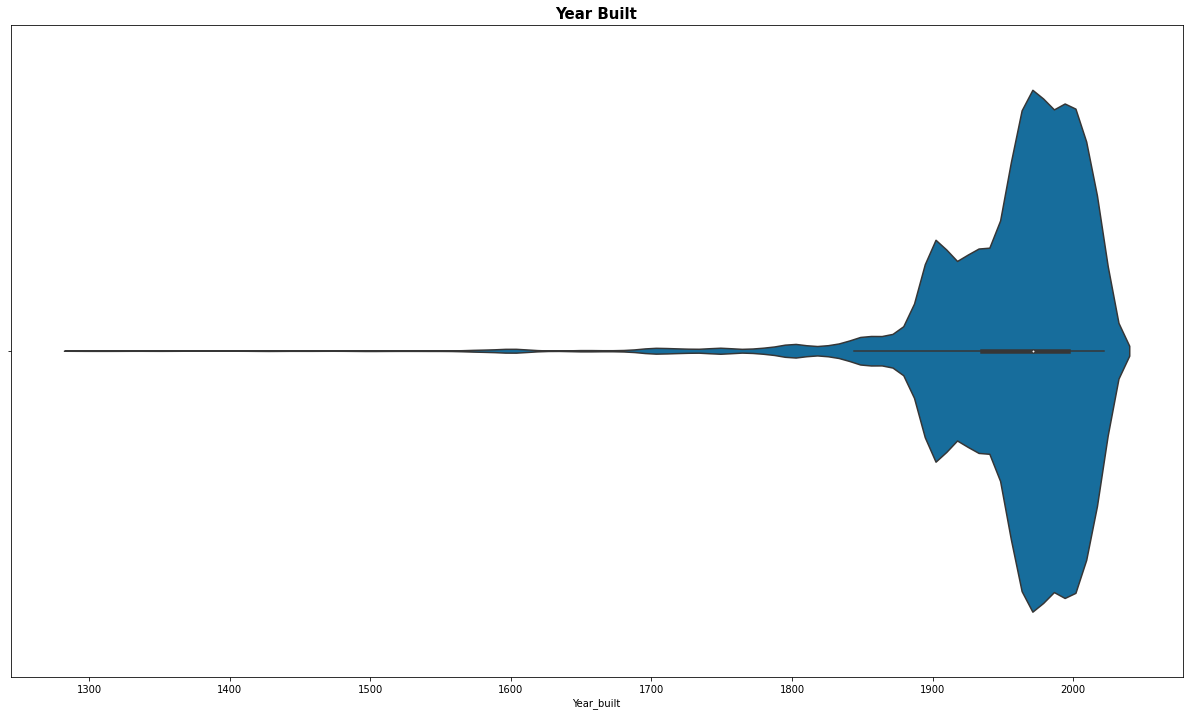

In [42]:
# plot year built
plt.figure(figsize=(21,12)) 
plt.title('Year Built', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Year_built'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Year built'}, xlabel='Year_built', ylabel='count'>

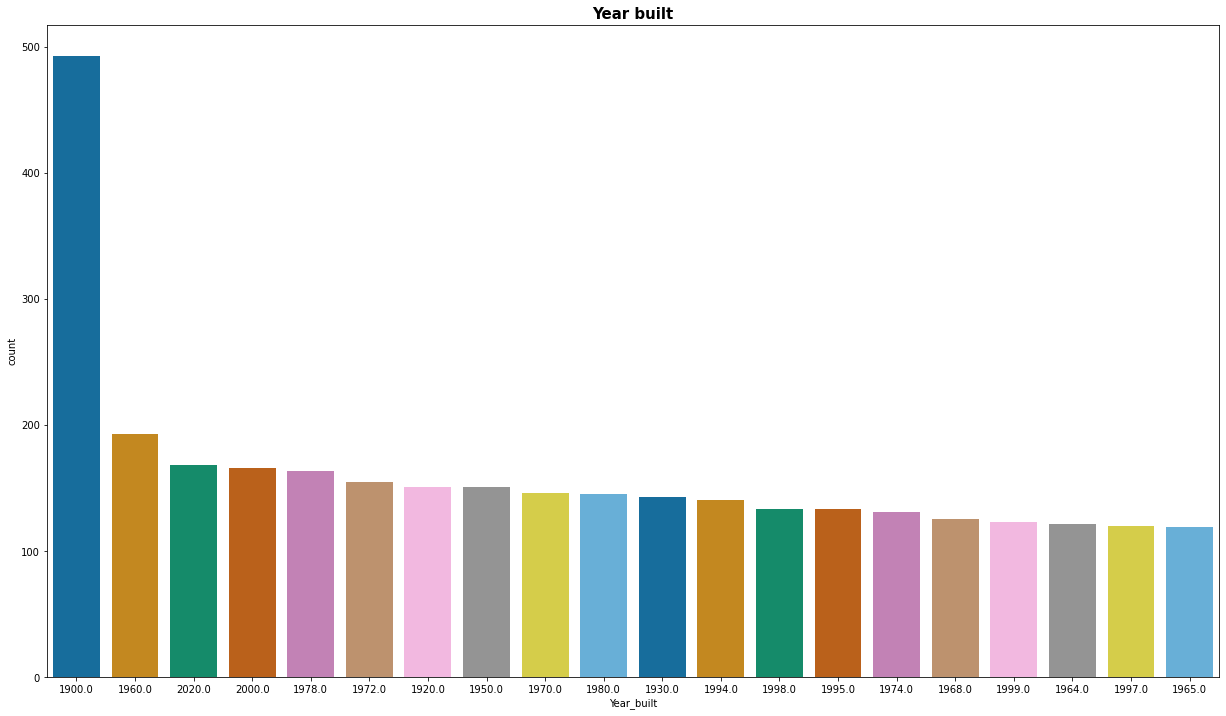

In [43]:
# plot year built - first 20
plt.figure(figsize=(21,12)) 
plt.title('Year built', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Year_built'], palette=colorblind_palette, order=df['Year_built'].value_counts().iloc[:20].index)

### Furnishing_quality

<AxesSubplot:title={'center':'Furnishing quality'}, xlabel='Furnishing_quality', ylabel='count'>

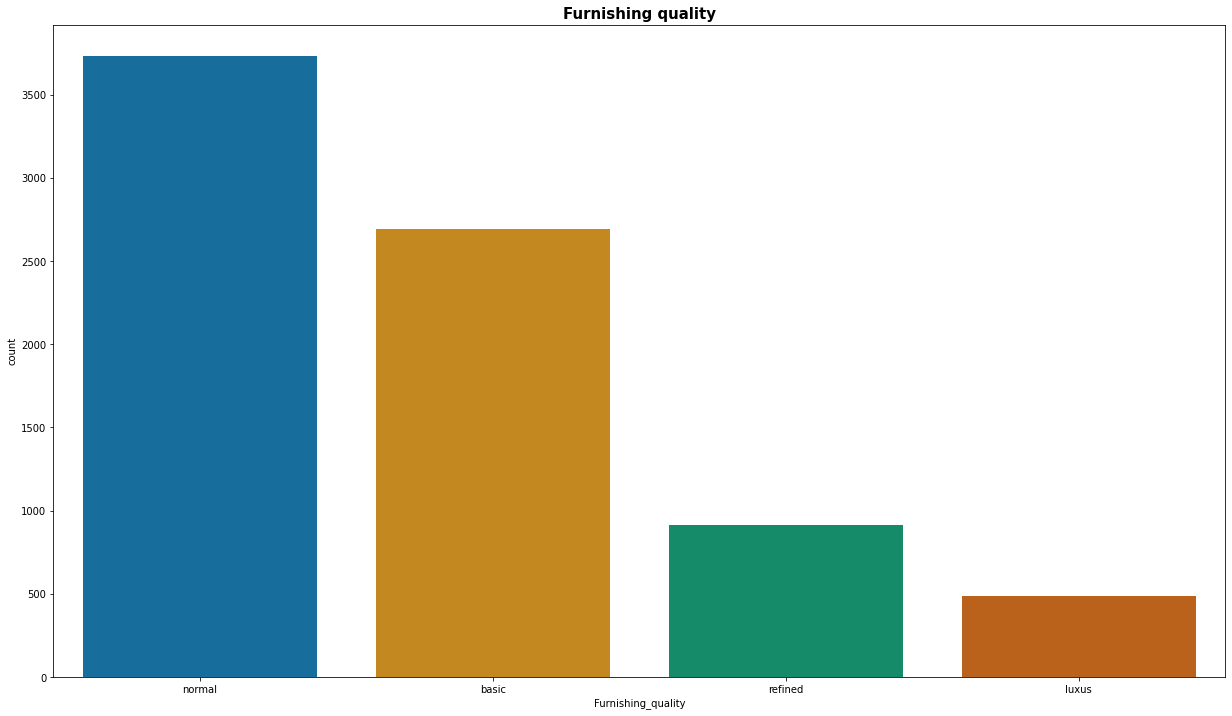

In [44]:
# the most used types
plt.figure(figsize=(21,12)) 
plt.title('Furnishing quality', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Furnishing_quality'], data=df, palette=colorblind_palette)

### Year_renovated

<AxesSubplot:title={'center':'Year Built'}, xlabel='Year_built'>

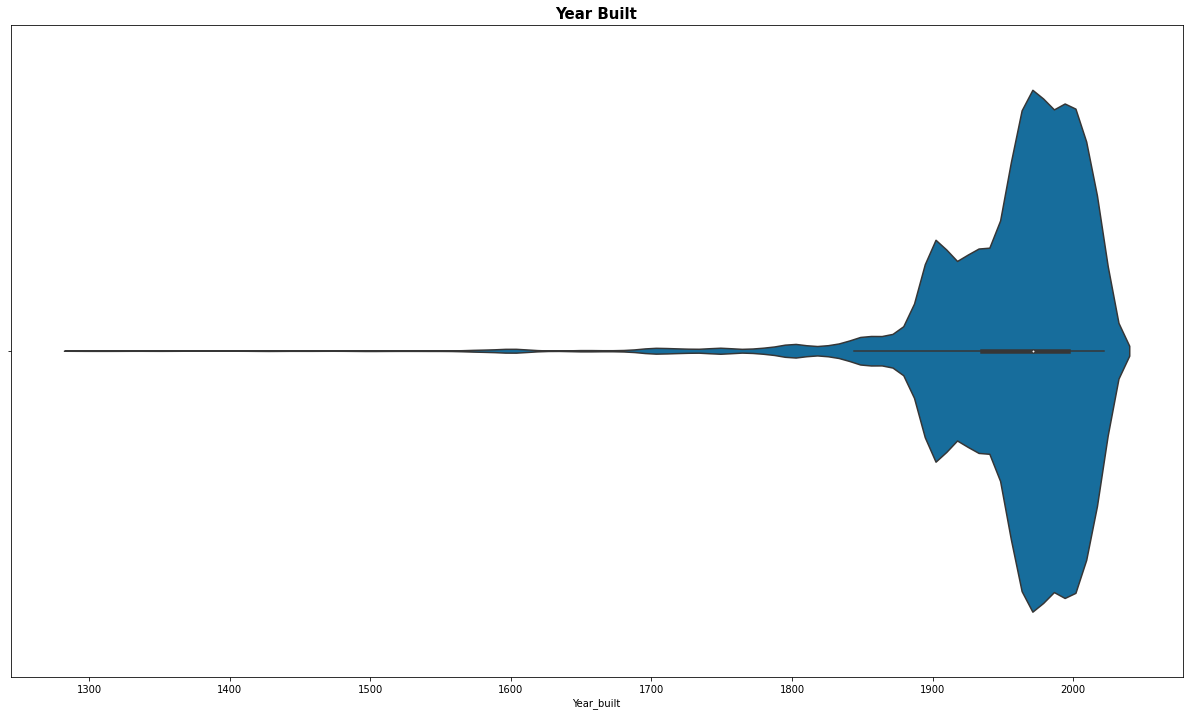

In [45]:
# plot year renovated
plt.figure(figsize=(21,12)) 
plt.title('Year Built', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Year_built'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Year renovated'}, xlabel='Year_renovated', ylabel='count'>

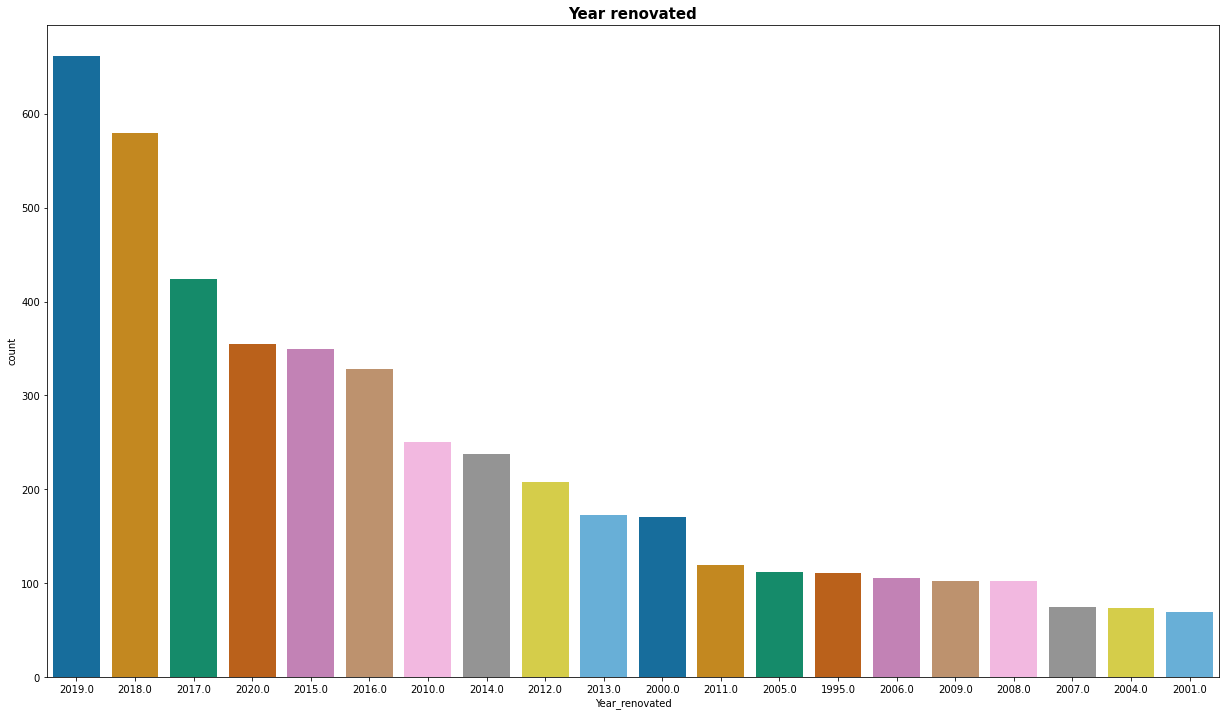

In [46]:
# plot year renovated - first 20
plt.figure(figsize=(21,12)) 
plt.title('Year renovated', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Year_renovated'], palette=colorblind_palette, order=df['Year_renovated'].value_counts().iloc[:20].index)

### Condition

<AxesSubplot:title={'center':'Condition'}, xlabel='Condition', ylabel='count'>

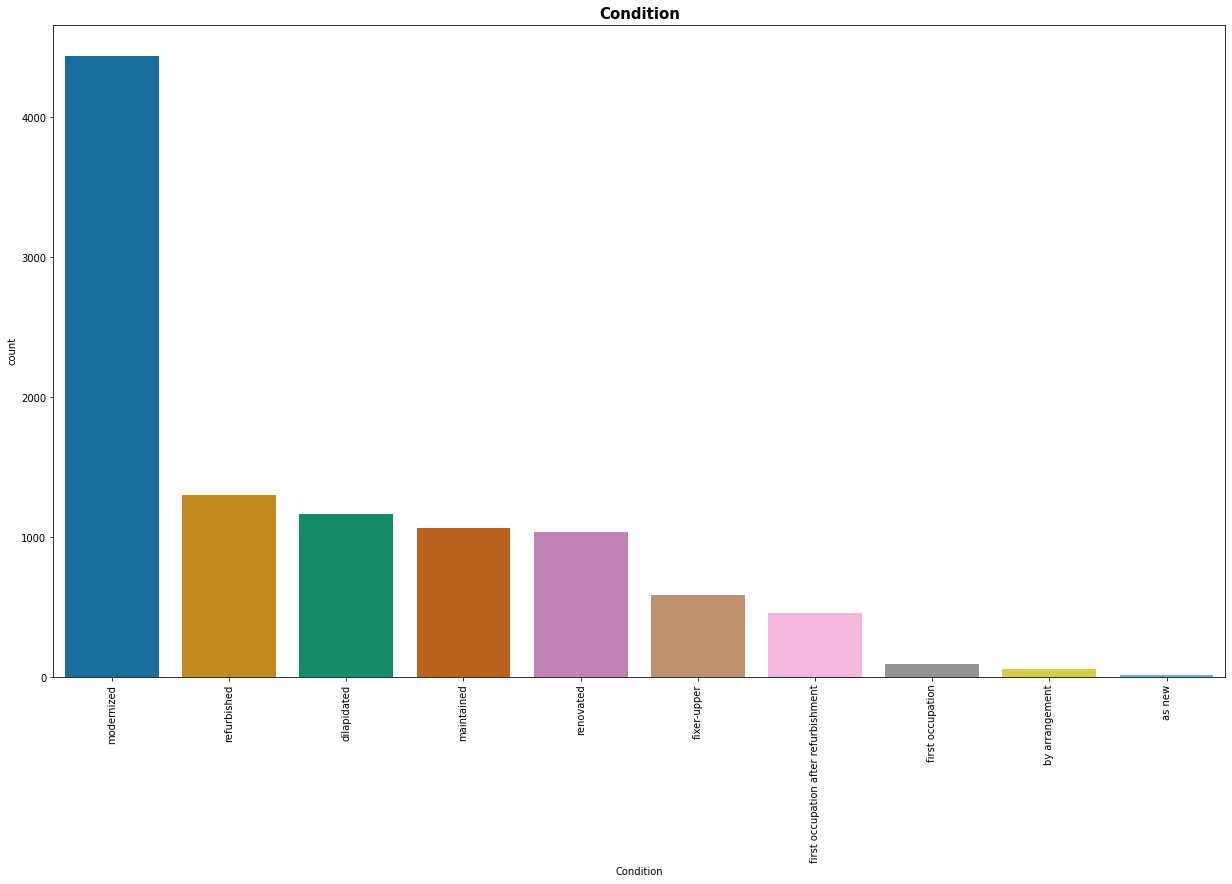

In [47]:
# plot all condition types
plt.figure(figsize=(21,12)) 
plt.title('Condition', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Condition'], data=df, palette=colorblind_palette, order=df['Condition'].value_counts().iloc[:].index)

### Heating

<AxesSubplot:title={'center':'Heating'}, xlabel='Heating', ylabel='count'>

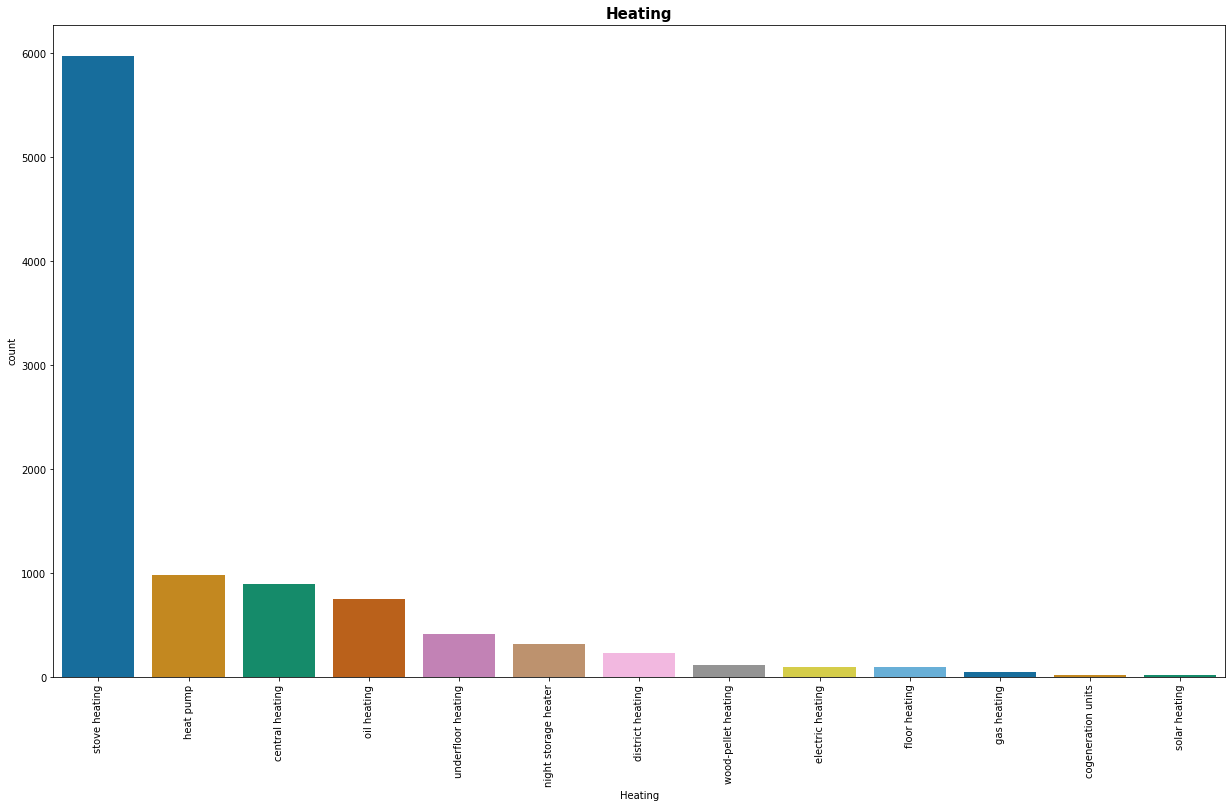

In [48]:
# plot all heating types
plt.figure(figsize=(21,12)) 
plt.title('Heating', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Heating'], data=df, palette=colorblind_palette, order=df['Heating'].value_counts().iloc[:].index)

### Energy source

<AxesSubplot:title={'center':'Energy source'}, xlabel='Energy_source', ylabel='count'>

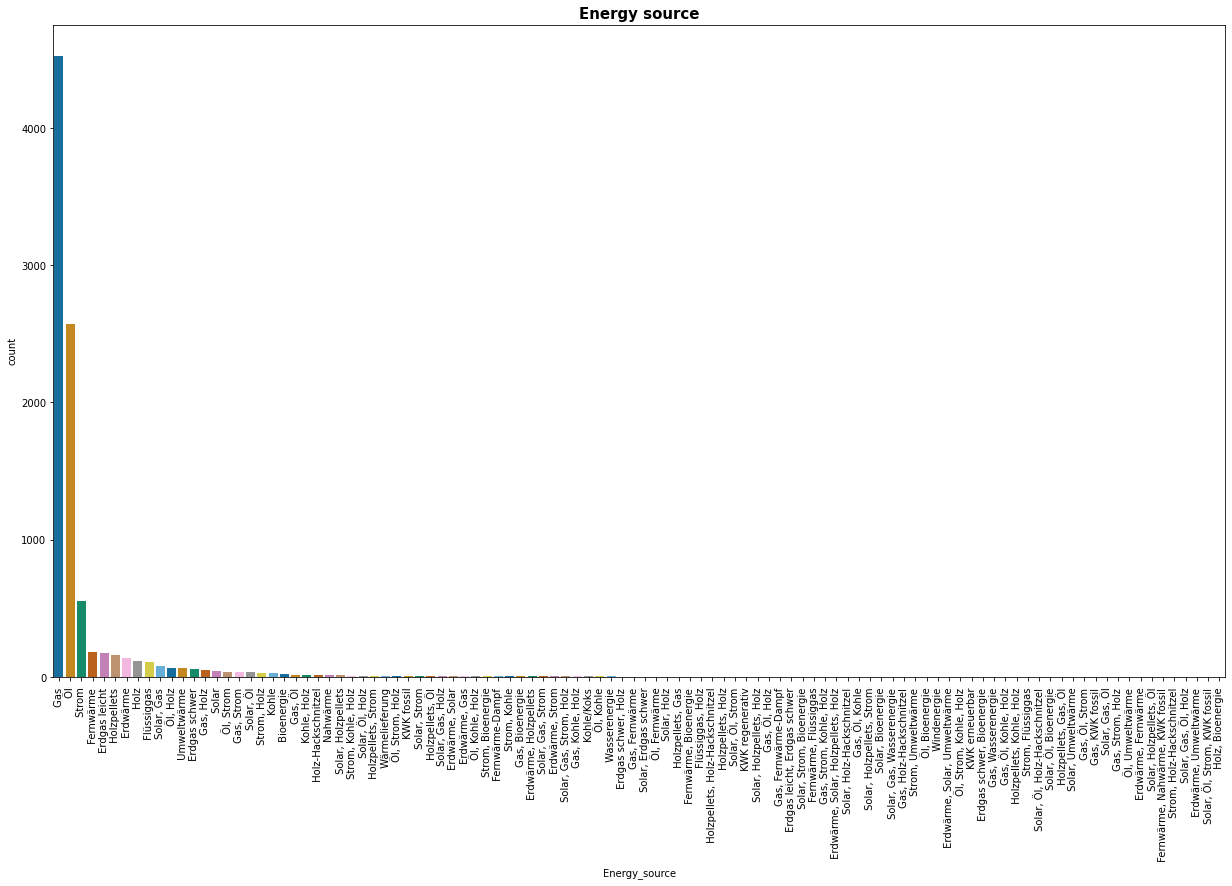

In [49]:
# plot all energy sources
plt.figure(figsize=(21,12)) 
plt.title('Energy source', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_source'], data=df, palette=colorblind_palette, order=df['Energy_source'].value_counts().iloc[:].index)

<AxesSubplot:title={'center':'Energy source'}, xlabel='Energy_source', ylabel='count'>

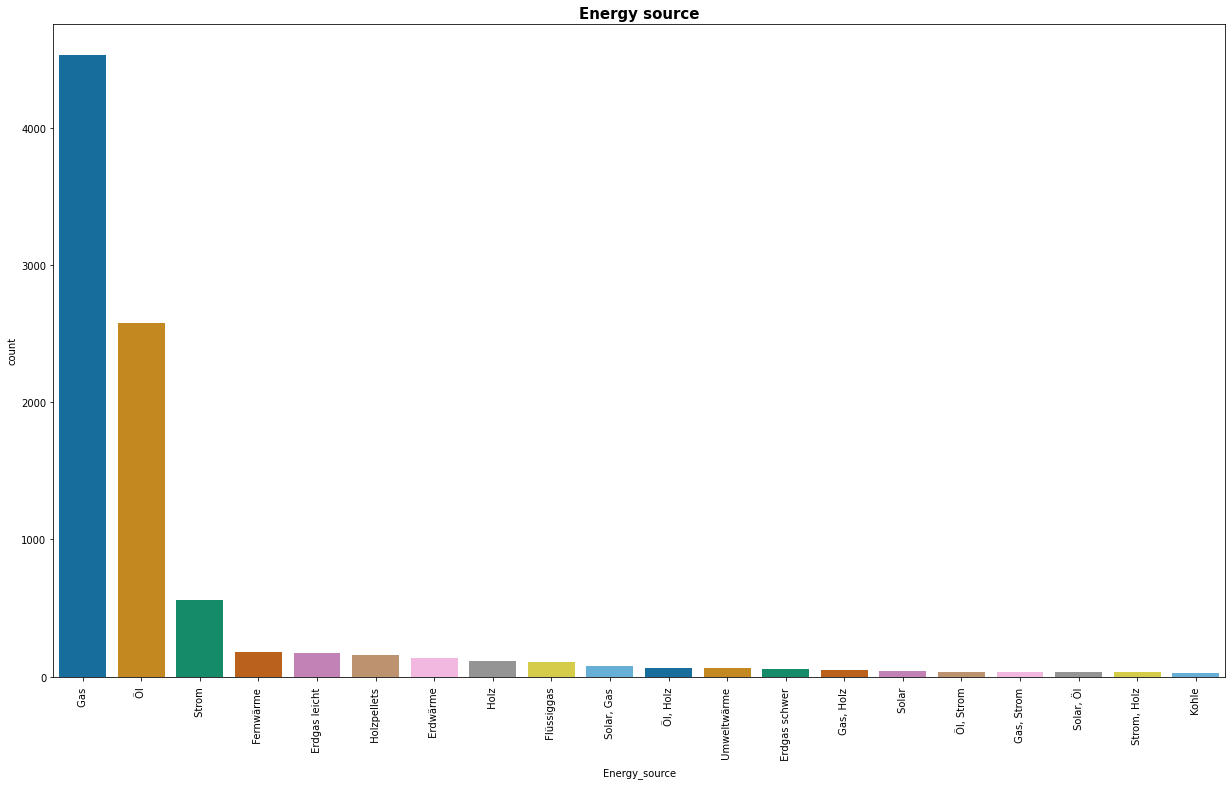

In [50]:
# plot first 20 sources
plt.figure(figsize=(21,12)) 
plt.title('Energy source', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_source'], data=df, palette=colorblind_palette, order=df['Energy_source'].value_counts().iloc[:20].index)

### Energy certificate   

<AxesSubplot:title={'center':'Energy_certificate'}, xlabel='Energy_certificate', ylabel='count'>

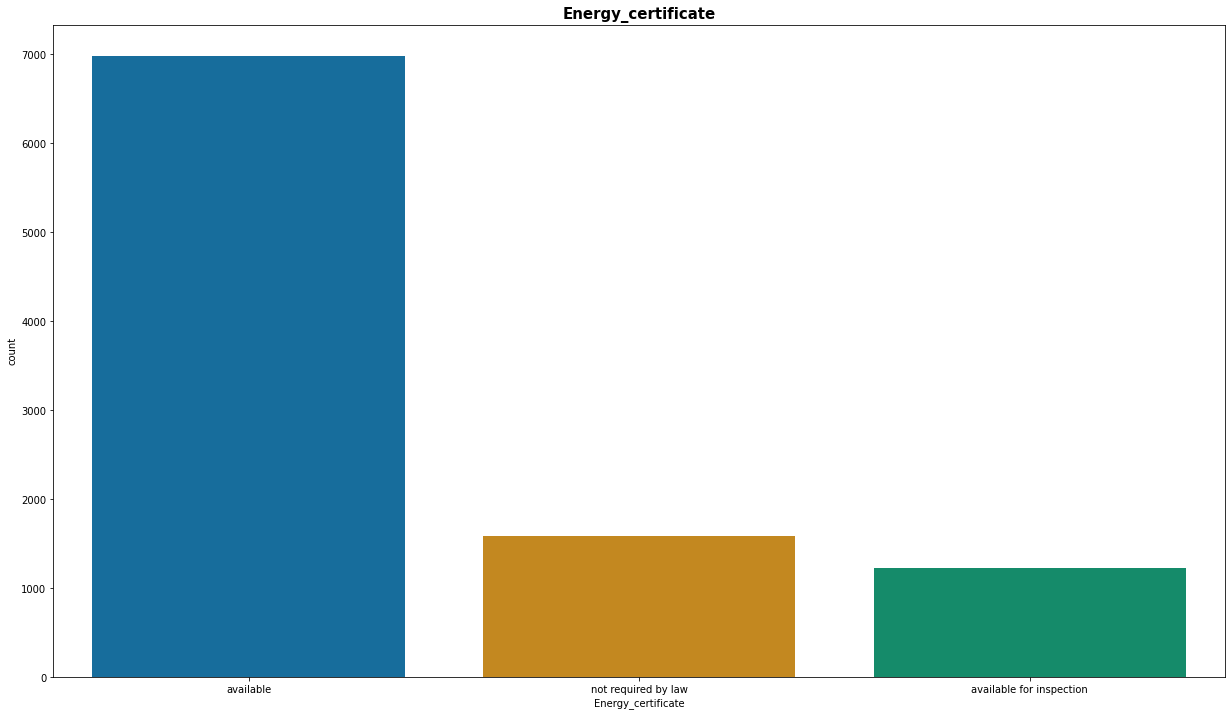

In [51]:
# plot all energy certificates
plt.figure(figsize=(21,12)) 
plt.title('Energy_certificate', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_certificate'], data=df, palette=colorblind_palette)

### Energy certificate type 

<AxesSubplot:title={'center':'Energy_certificate_type'}, xlabel='Energy_certificate_type', ylabel='count'>

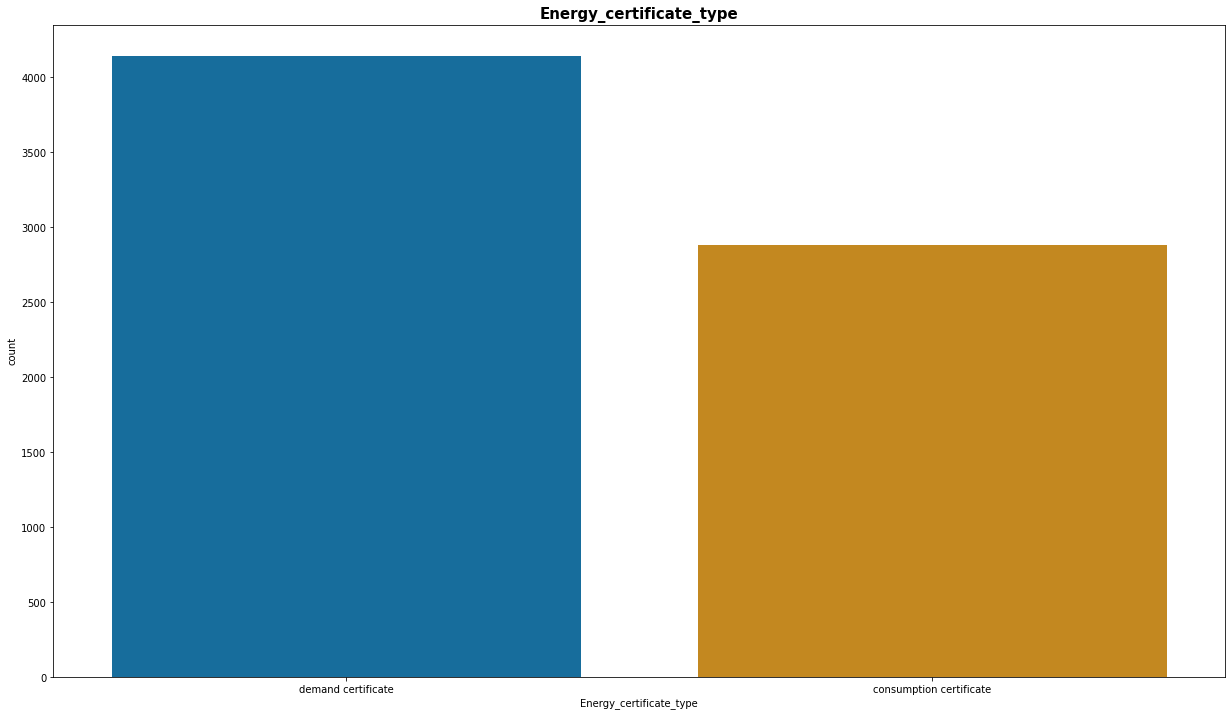

In [52]:
# plot all energy certificate types
plt.figure(figsize=(21,12)) 
plt.title('Energy_certificate_type', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_certificate_type'], data=df, palette=colorblind_palette)

### Energy_consumption

<AxesSubplot:title={'center':'Energy consumption'}, xlabel='Energy_consumption'>

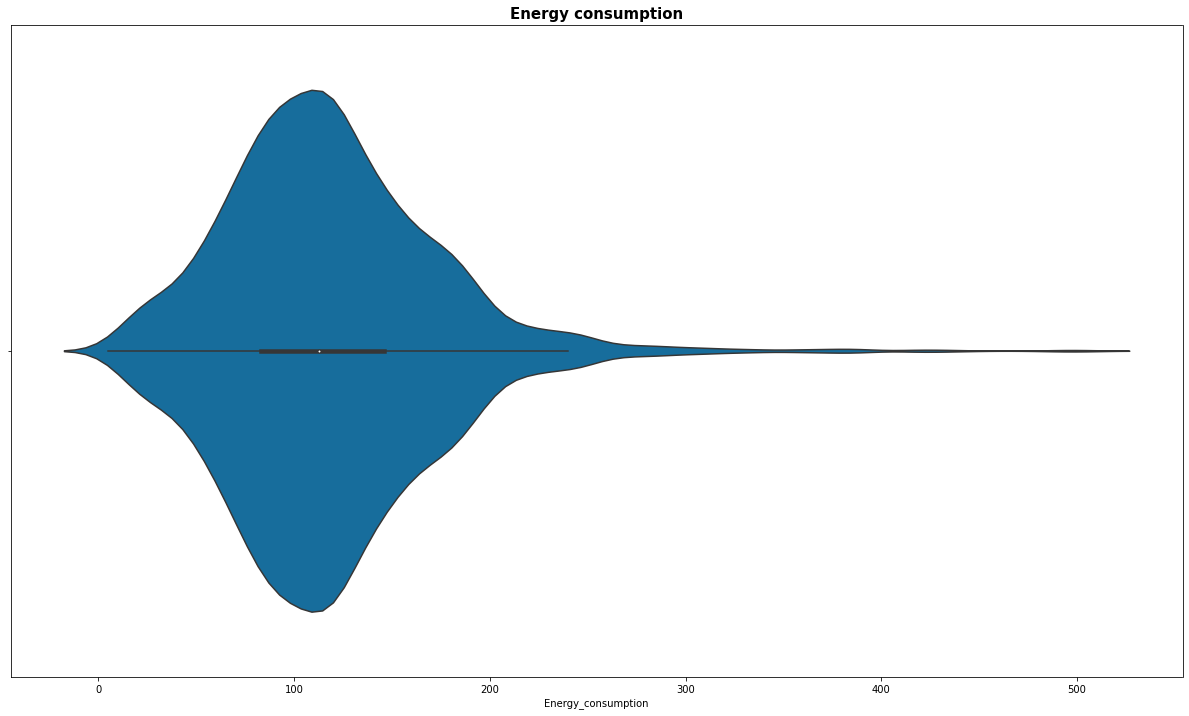

In [53]:
# plot energy consumption
plt.figure(figsize=(21,12)) 
plt.title('Energy consumption', fontsize=15, fontweight='bold', ha='center')
sns.violinplot(x=df['Energy_consumption'], palette=colorblind_palette)

<AxesSubplot:title={'center':'Energy consumption'}, xlabel='Energy_consumption', ylabel='count'>

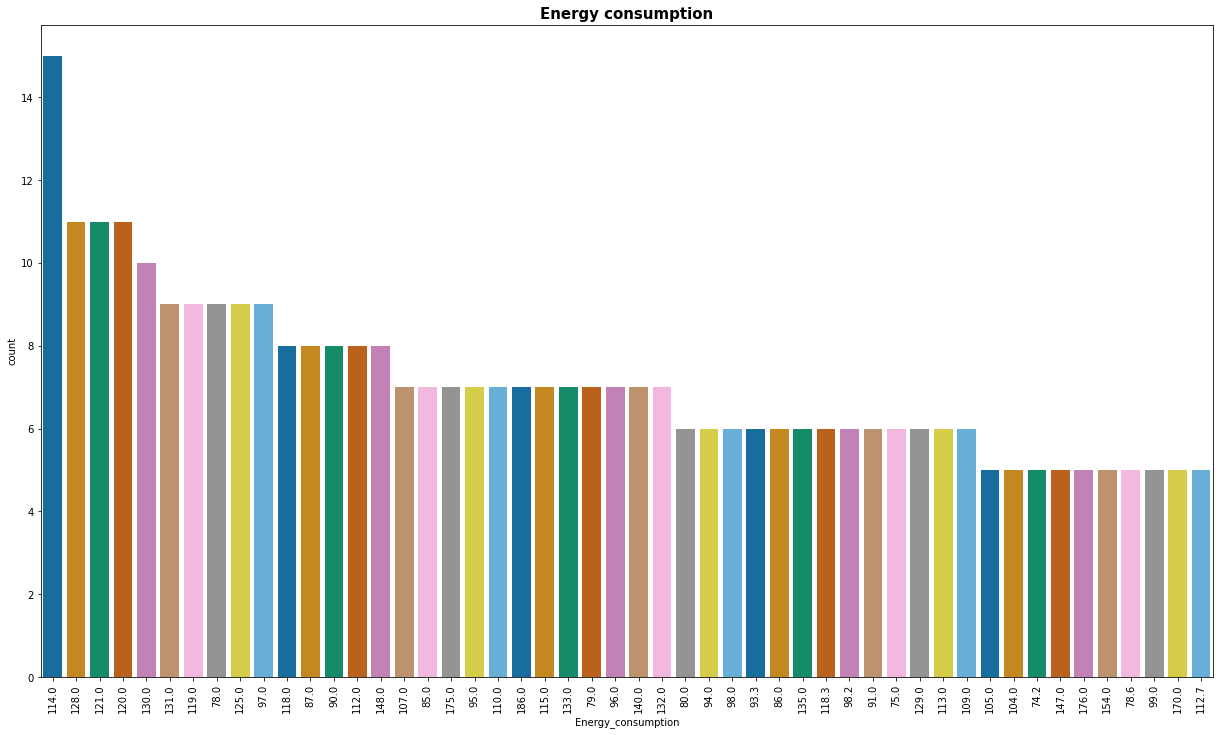

In [54]:
# plot first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Energy consumption', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Energy_consumption'], data=df, palette=colorblind_palette, order=df['Energy_consumption'].value_counts().iloc[:50].index)

### Energy efficiency class

<AxesSubplot:title={'center':'Energy efficiency class'}, xlabel='Energy_efficiency_class', ylabel='count'>

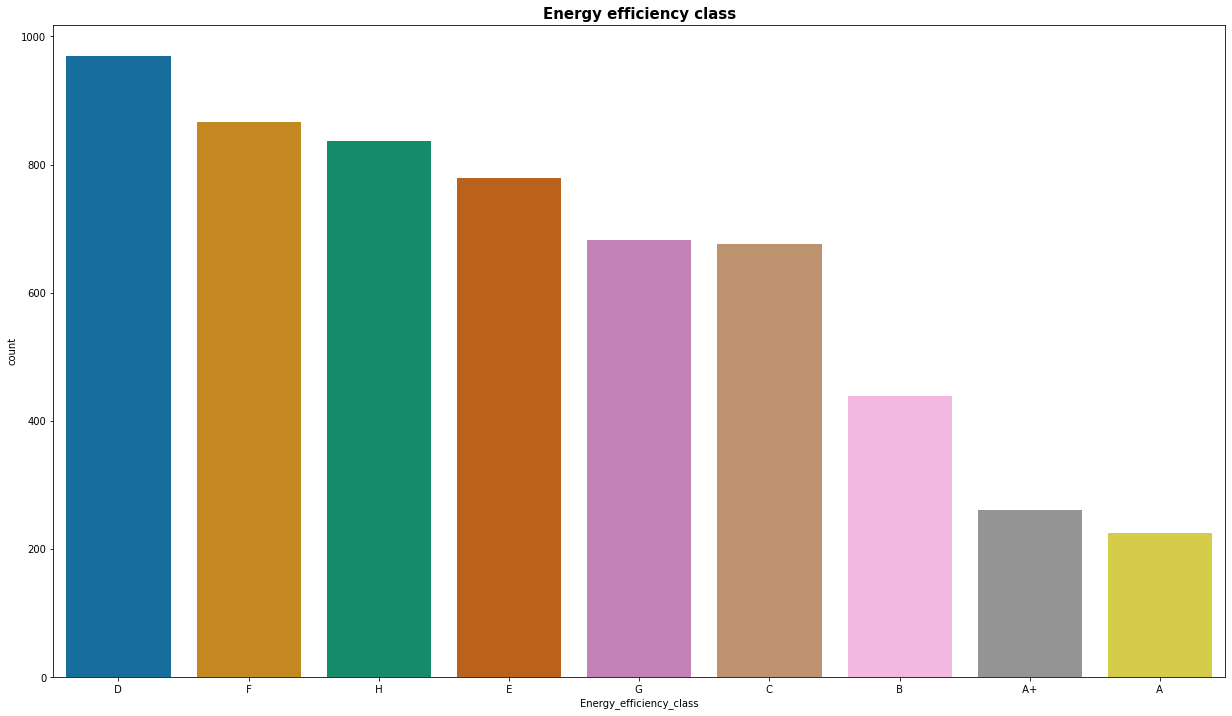

In [55]:
# plot all energy efficience classes
plt.figure(figsize=(21,12)) 
plt.title('Energy efficiency class', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Energy_efficiency_class'], data=df, palette=colorblind_palette, order=df['Energy_efficiency_class'].value_counts().iloc[:].index)

### State                       

<AxesSubplot:title={'center':'State'}, xlabel='State', ylabel='count'>

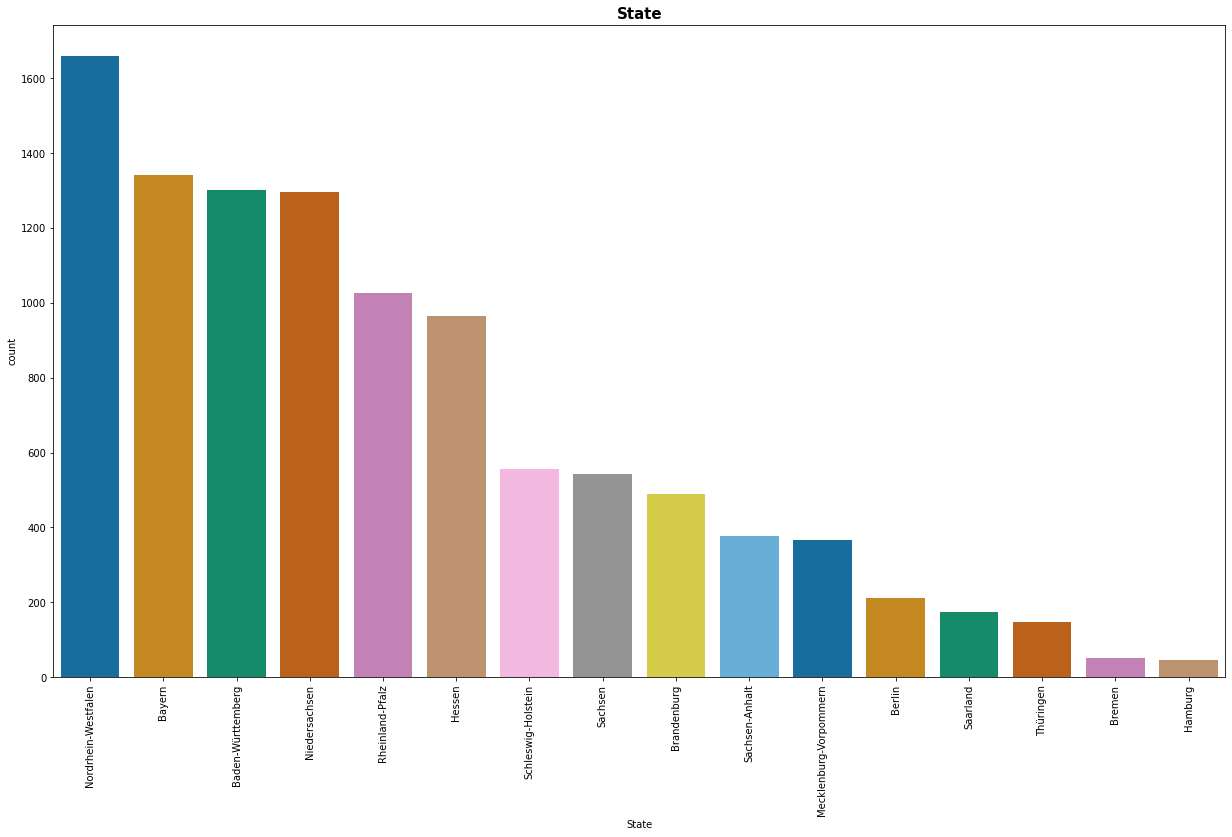

In [56]:
# plot all energy certificate types
plt.figure(figsize=(21,12)) 
plt.title('State', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['State'], data=df, palette=colorblind_palette, order=df['State'].value_counts().iloc[:].index)

### City                     

<AxesSubplot:title={'center':'City'}, xlabel='City', ylabel='count'>

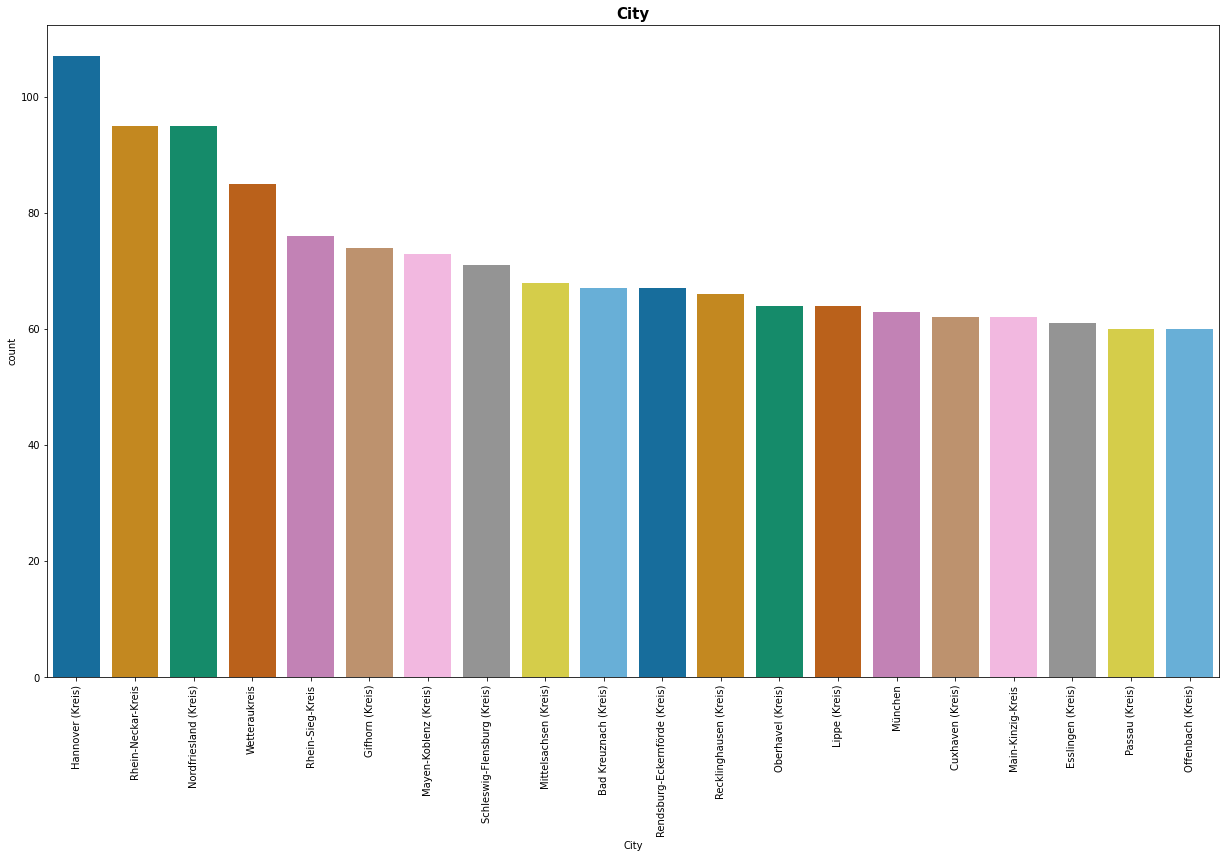

In [57]:
# plot first 20 cites
plt.figure(figsize=(21,12)) 
plt.title('City', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['City'], data=df, palette=colorblind_palette, order=df['City'].value_counts().iloc[:20].index)

### Place

<AxesSubplot:title={'center':'Place'}, xlabel='Place', ylabel='count'>

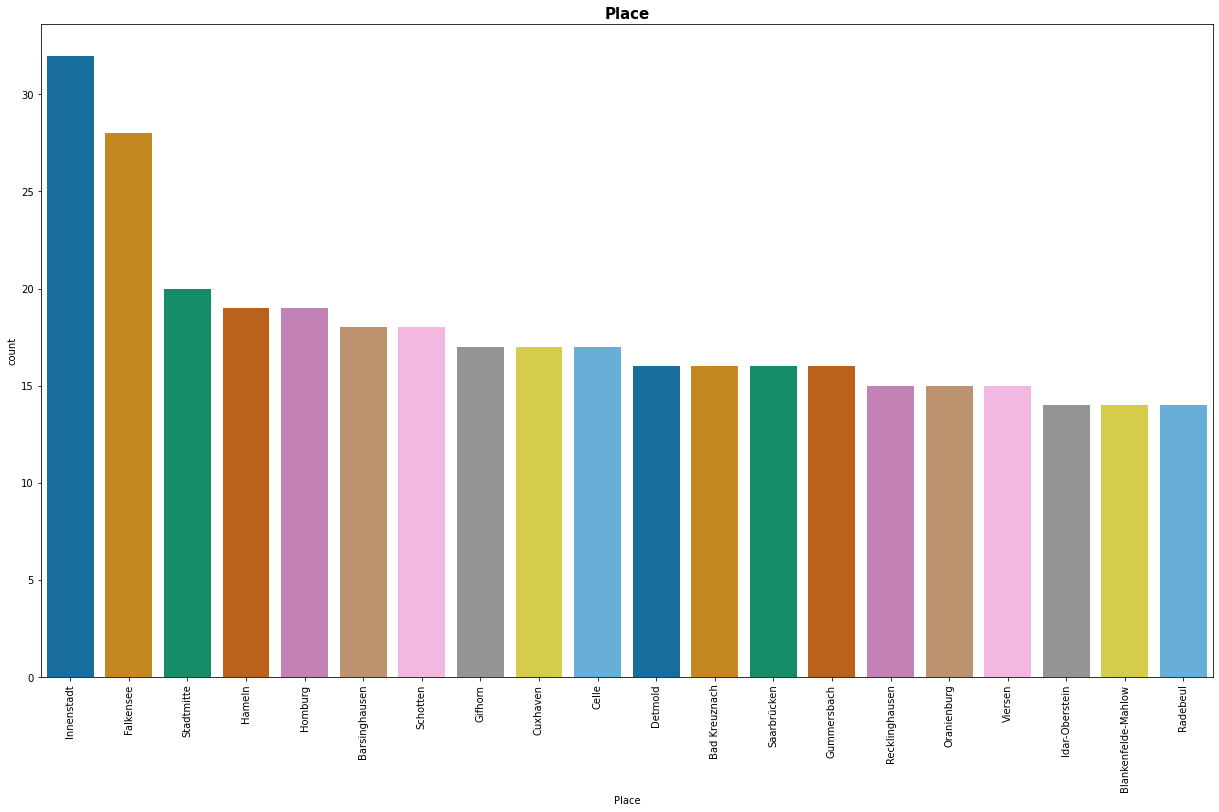

In [58]:
# plot first 20 places
plt.figure(figsize=(21,12)) 
plt.title('Place', fontsize=15, fontweight='bold', ha='center')
plt.xticks(rotation=90)
sns.countplot(x=df['Place'], data=df, palette=colorblind_palette, order=df['Place'].value_counts().iloc[:20].index)

### Garages

<AxesSubplot:title={'center':'Garages'}, xlabel='Garages', ylabel='count'>

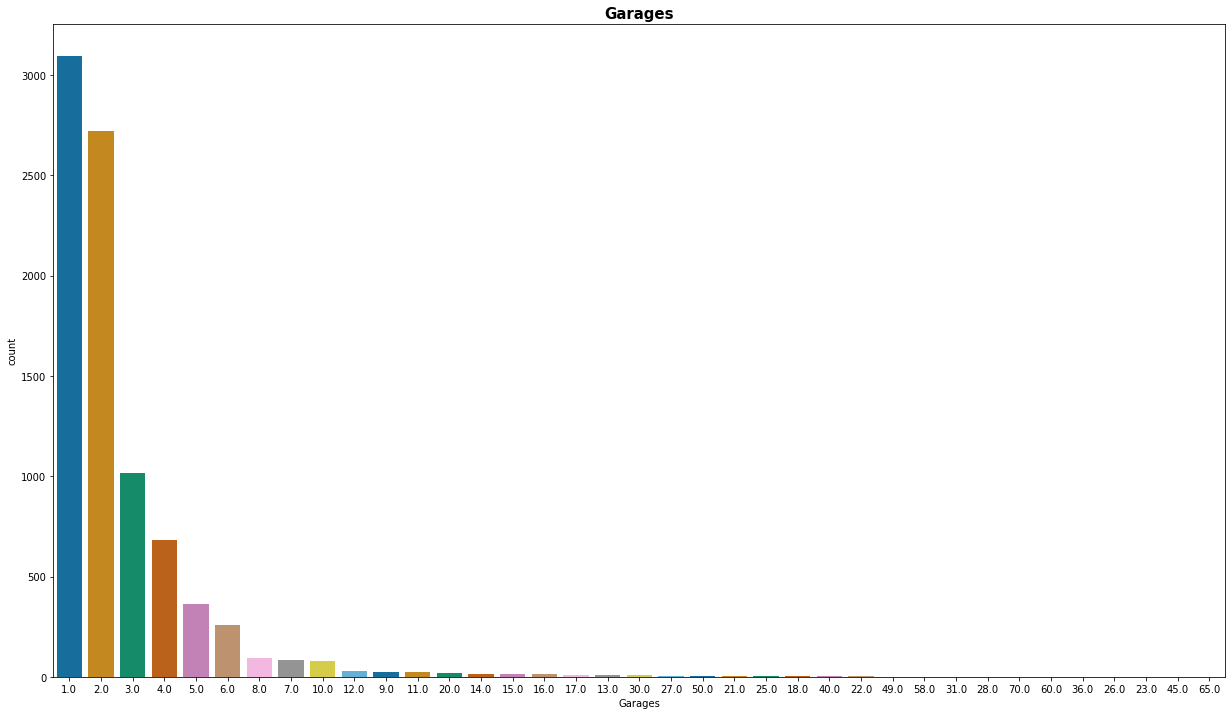

In [59]:
# plot first 20 records
plt.figure(figsize=(21,12)) 
plt.title('Garages', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Garages'], data=df, palette=colorblind_palette, order=df['Garages'].value_counts().iloc[:].index)

### Garagetype      

<AxesSubplot:title={'center':'Garagetype'}, xlabel='Garagetype', ylabel='count'>

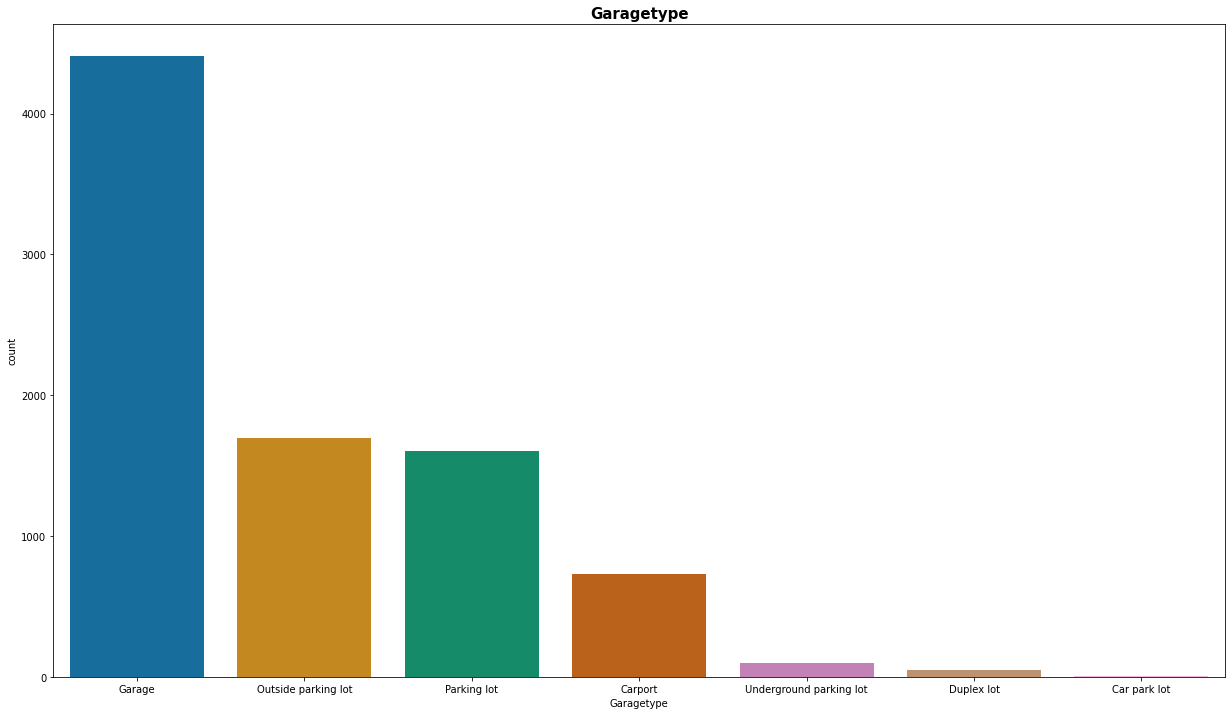

In [60]:
# plot first 20 garage types
plt.figure(figsize=(21,12)) 
plt.title('Garagetype', fontsize=15, fontweight='bold', ha='center')
sns.countplot(x=df['Garagetype'], data=df, palette=colorblind_palette, order=df['Garagetype'].value_counts().iloc[:].index)

## Analytical questions

### What does influence the most property prices?

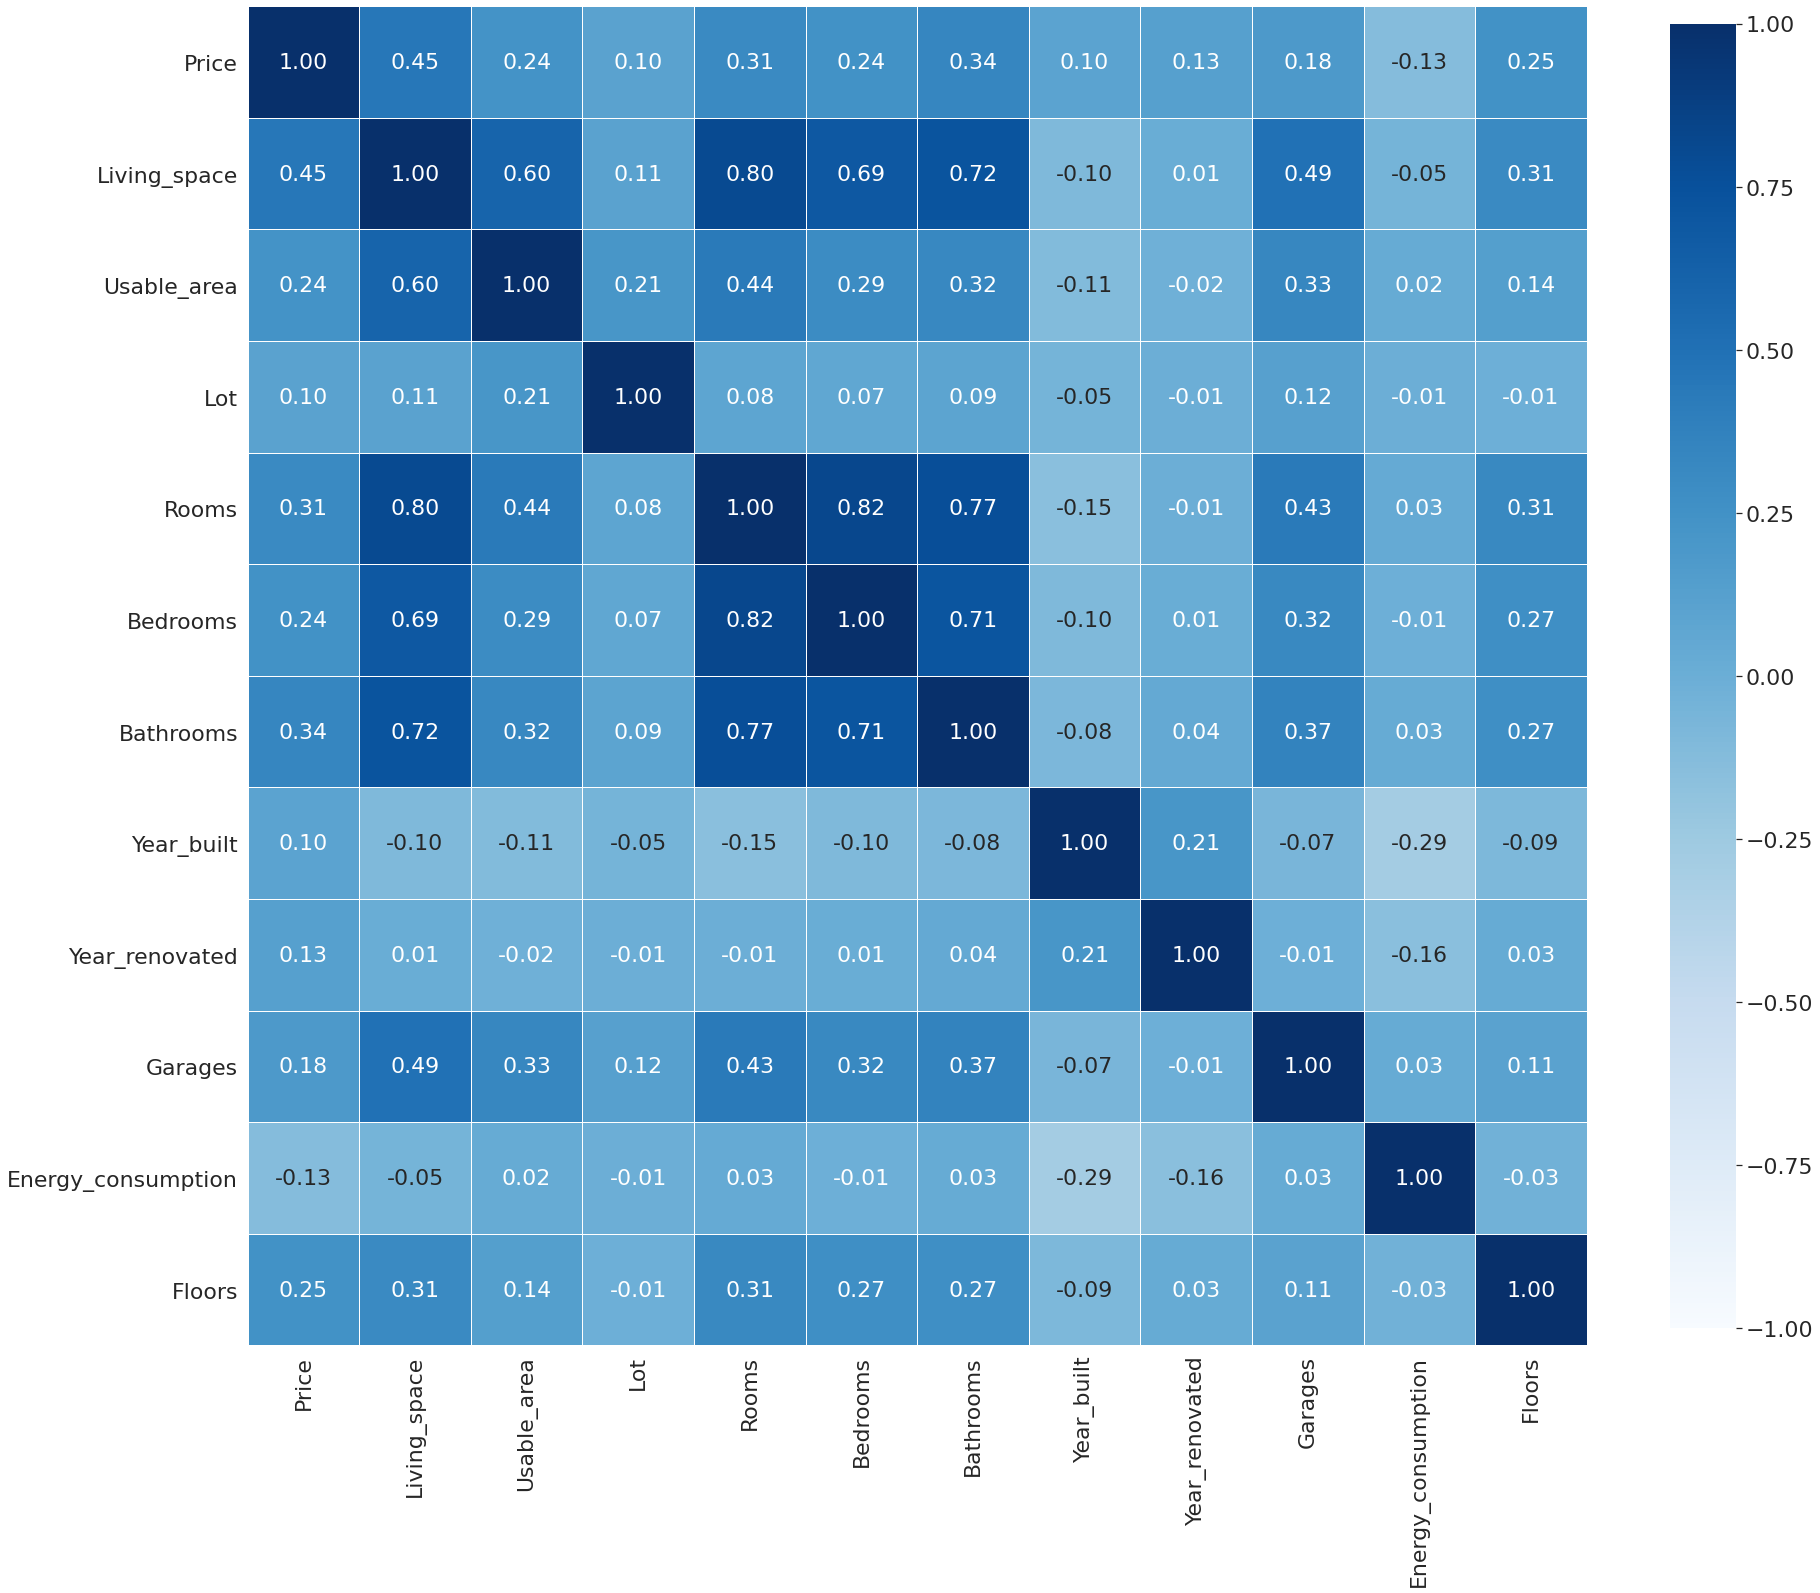

In [103]:
# plot heatmap
# sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(30, 30))
corr_data = df[['Price', 'Living_space', 'Usable_area', 'Lot', 'Rooms', 'Bedrooms', 'Bathrooms', 'Year_built', 'Year_renovated', 'Garages', 'Energy_consumption', 'Floors']].copy()
correlations = corr_data.corr() 
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8}, linewidths=.7, annot_kws={'fontsize':22})
plt.show()

In [101]:
# make price categories 

In [ ]:
# see relationship between number of rooms and price 